In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import numpy as np

In [11]:
#saving_dir = 'F:\Documents\cours_mva\stages\Padova\july_work\meeting_21_7' 
saving_dir = 'F:\Documents\cours_mva\stages\Padova/august_work'
n_rc = 11164352
n_mnist = 166248

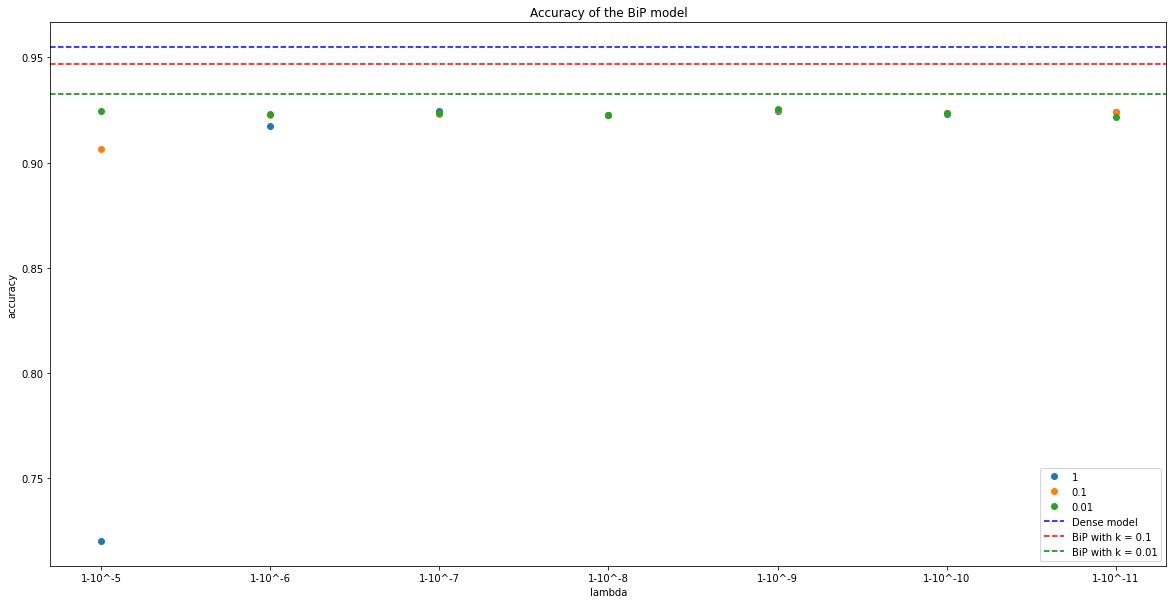

In [ ]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_1 = [None] * 7
accuracies_01 = [None] * 7
accuracies_001 = [None] * 7

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])

            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))
            
            #the index is then i = lambda_value - 5
            i = lambda_value - 5
            if folder.endswith('001'):
                accuracies_001[i] = max_accuracy/100
            elif folder.endswith('01'):
                accuracies_01[i] = max_accuracy/100
            else:
                accuracies_1[i] = max_accuracy/100
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_1, 'o', label='1')
plt.plot(xs, accuracies_01, 'o', label='0.1')
plt.plot(xs, accuracies_001, 'o', label='0.01')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.9325, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()
plt.xlabel('lambda')
plt.ylabel('accuracy')

plt.title('Accuracy of the BiP model')

#save the figure 
plt.savefig(os.path.join(saving_dir, 'FIGURE_1.png'), dpi=300, facecolor='w')

plt.show()

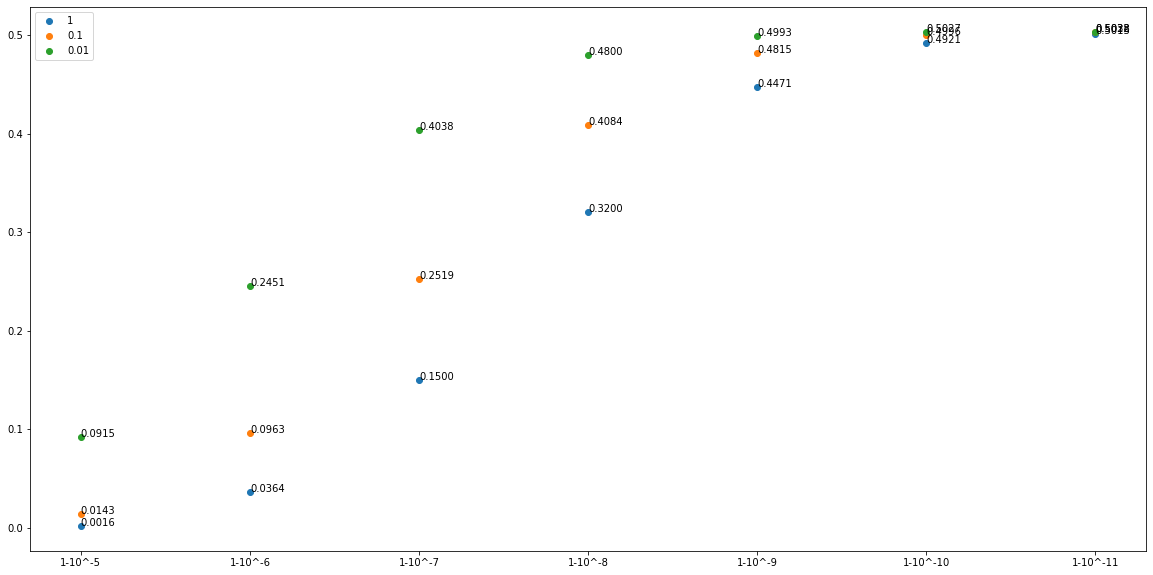

In [ ]:
#get the final l0 norm for all pb1 exps
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
norms_1 = [None] * 7
norms_01 = [None] * 7
norms_001 = [None] * 7

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            
            #we want to have the l0 norm associated with the epoch that gave the best accuracy
            #so we have to get the epoch number
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            
            #get the epoch number
            epoch_number = matches.index(max(matches))

            #now we open 'epochs_data.npy' and get the l0 norm at the right epoch
            epochs_data = np.load(os.path.join(folder, 'epochs_data.npy'), allow_pickle=True)
            l0_norm = epochs_data[epoch_number][0]

            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))
            
            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))

            
            #the index is then i = lambda_value - 5
            i = lambda_value - 5
            if folder.endswith('001'):
                norms_001[i] = l0_norm/n
            elif folder.endswith('01'):
                norms_01[i] = l0_norm/n
            else:
                norms_1[i] = l0_norm/n
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
#at each point, annotate the value of the l0 norm
plt.plot(xs, norms_1, 'o', label='1')
for i, norm in enumerate(norms_1):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_1[i]))

plt.plot(xs, norms_01, 'o', label='0.1')
for i, norm in enumerate(norms_01):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_01[i]))

plt.plot(xs, norms_001, 'o', label='0.01')
for i, norm in enumerate(norms_001):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_001[i]))


plt.legend()

#save the figure 
plt.savefig(os.path.join(saving_dir, 'FIGURE_2.png'), dpi=300, facecolor='w')

plt.show()


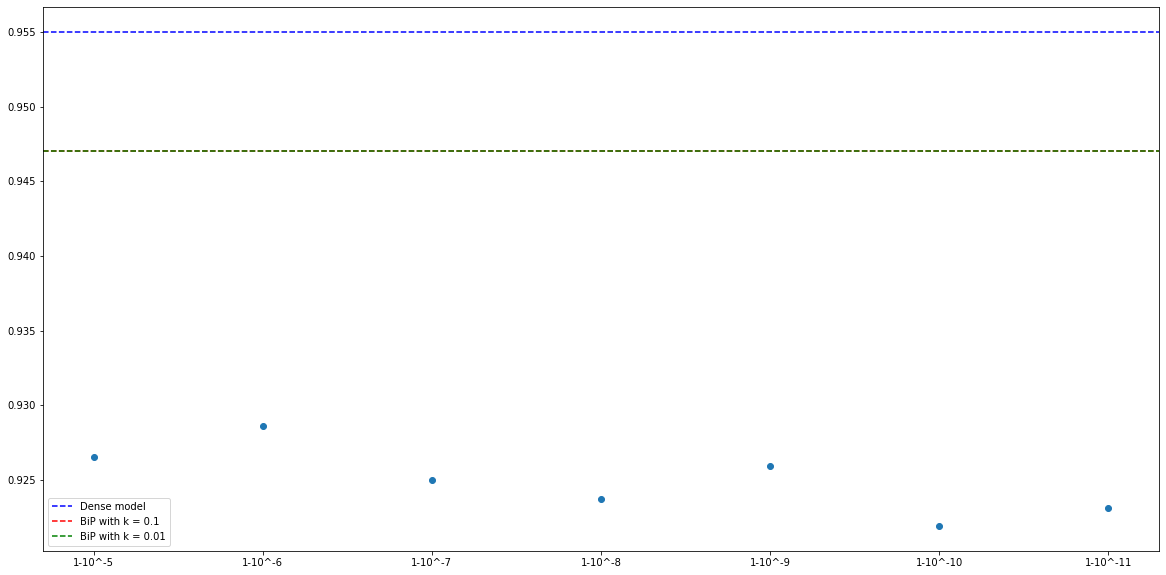

In [ ]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies = []

for folder in os.listdir('./'):
    if 'pb2' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            accuracies.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies, 'o')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

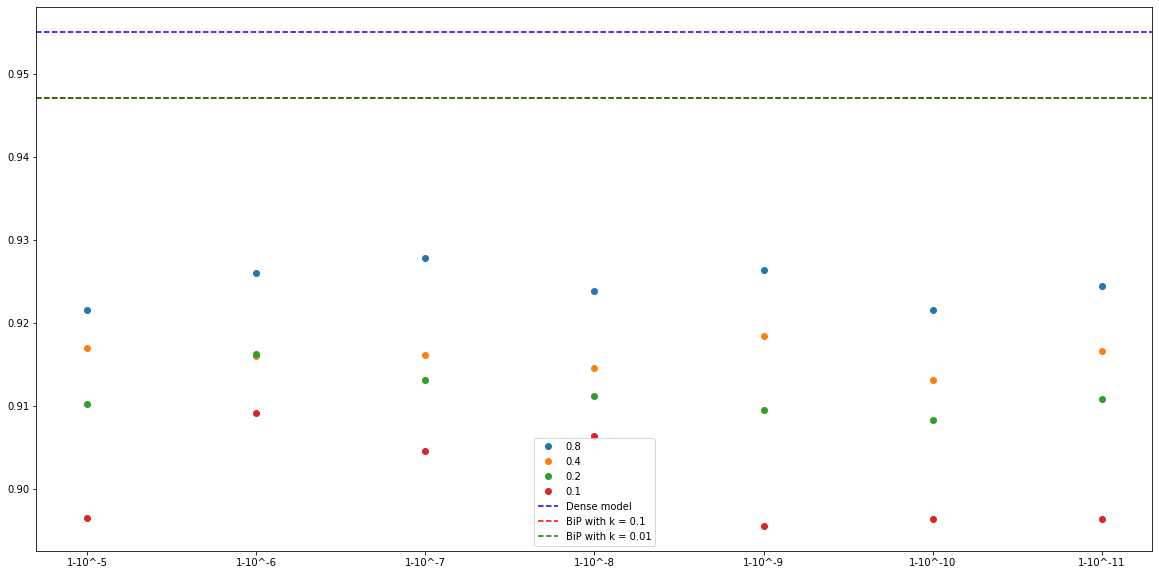

In [ ]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_08 = []
accuracies_04 = []
accuracies_02 = []
accuracies_01 = []

for folder in os.listdir('./'):
    if 'pb3' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            if folder.endswith('08'):
                accuracies_08.append(max_accuracy/100)
            elif folder.endswith('04'):
                accuracies_04.append(max_accuracy/100)
            elif folder.endswith('02'):
                accuracies_02.append(max_accuracy/100)
            else:
                accuracies_01.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_08, 'o', label='0.8')
plt.plot(xs, accuracies_04, 'o', label='0.4')
plt.plot(xs, accuracies_02, 'o', label='0.2')
plt.plot(xs, accuracies_01, 'o', label='0.1')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

In [ ]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_1 = []
accuracies_01 = []
accuracies_001 = []

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            if folder.endswith('001'):
                accuracies_001.append(max_accuracy/100)
            elif folder.endswith('01'):
                accuracies_01.append(max_accuracy/100)
            else:
                accuracies_1.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_1, 'o', label='1')
plt.plot(xs, accuracies_01, 'o', label='0.1')
plt.plot(xs, accuracies_001, 'o', label='0.01')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

In [ ]:
import matplotlib.animation as animation

#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
outer_gradients = epochs_data[0][-2]
masks = epochs_data[0][-1]

MovieWriter ffmpeg unavailable; using Pillow instead.


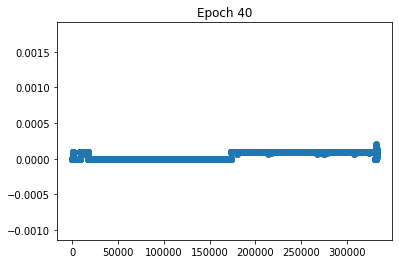

In [ ]:
vectors = outer_gradients
fig, ax = plt.subplots()

# Initialize a scatter object for the plot
scatter = ax.scatter(range(len(vectors[0])), vectors[0])

# Define an update function for the animation
def update(i):
    scatter.set_offsets(np.c_[range(len(vectors[i])), vectors[i]])  # update the data of the scatter object
    #put the number of the epoch in the title
    ax.set_title('Epoch {}'.format(i))
    return scatter,

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=len(vectors), interval=800)

path = os.path.join(saving_dir, 'animation.gif')
ani.save(path, writer='ffmpeg', fps=1/0.8)

plt.show()

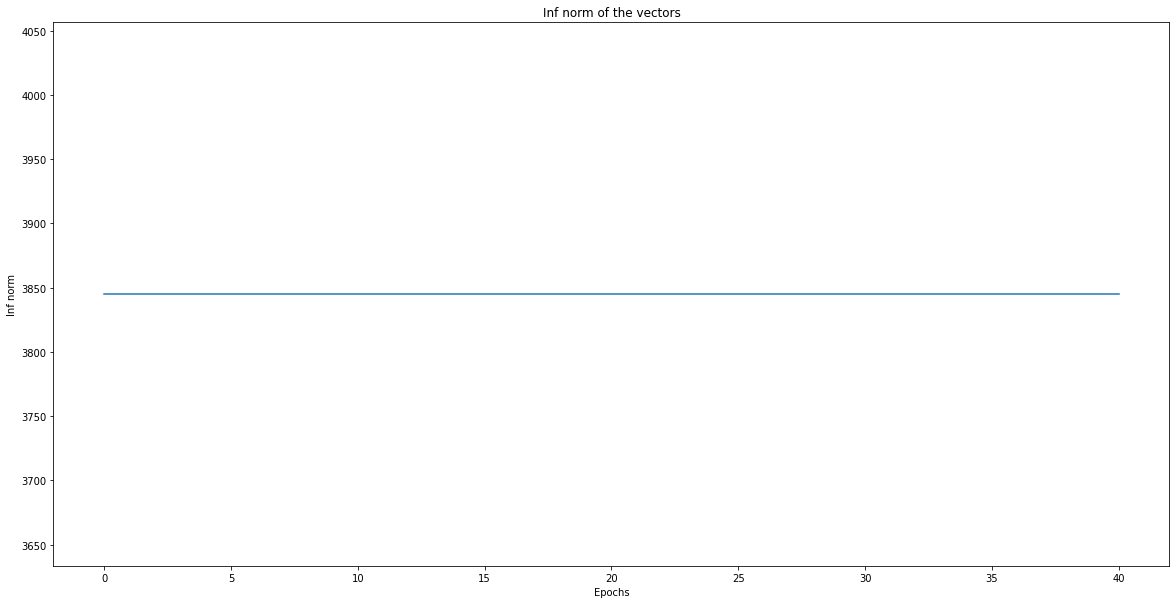

In [ ]:
#plot the inf norm of the outer gradients
vectors = masks
plt.figure(figsize=(20,10))
plt.plot(range(len(vectors)), [np.linalg.norm(vector, ord=0) for vector in vectors])
plt.title('Inf norm of the vectors')
plt.xlabel('Epochs')
plt.ylabel('Inf norm')
plt.show()



In [ ]:
#we want to know if the support stays the same during the training
#we will plot the number of different elements in the support at each epoch

vectors = outer_gradients
b = True
for i in range(len(vectors)-1):
    print(i)
    #check if support(i) is equal to support(i+1)
    for j in range(len(vectors[i])):
        if vectors[i][j] == 0 and vectors[i+1][j] > 0 or vectors[i][j] > 0 and vectors[i+1][j] == 0:
            print('support({}) is not equal to support({}) at index {}'.format(i, i+1, j))
            print('The values are : {} and {}'.format(vectors[i][j], vectors[i+1][j]))
            b = False
            break

if b :
    print('The support is exactly the same at each epoch')
else:
    print('The support is not the same at each epoch')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
The support is exactly the same at each epoch


In [ ]:
#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
duality_gaps = [epoch_data[-2][0] for epoch_data in epochs_data]
losses = [epoch_data[-1][0] for epoch_data in epochs_data]

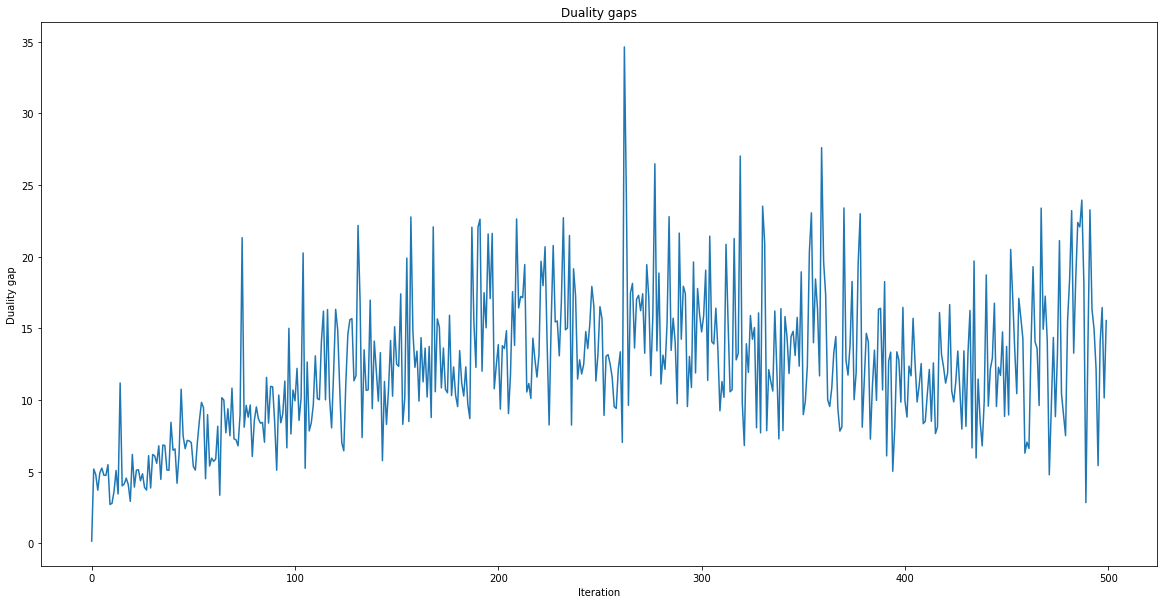

In [ ]:
#plot the duality gaps
plt.figure(figsize=(20,10))
plt.plot(range(len(duality_gaps)), duality_gaps)
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps.png'), dpi=300, facecolor='w')

plt.show()

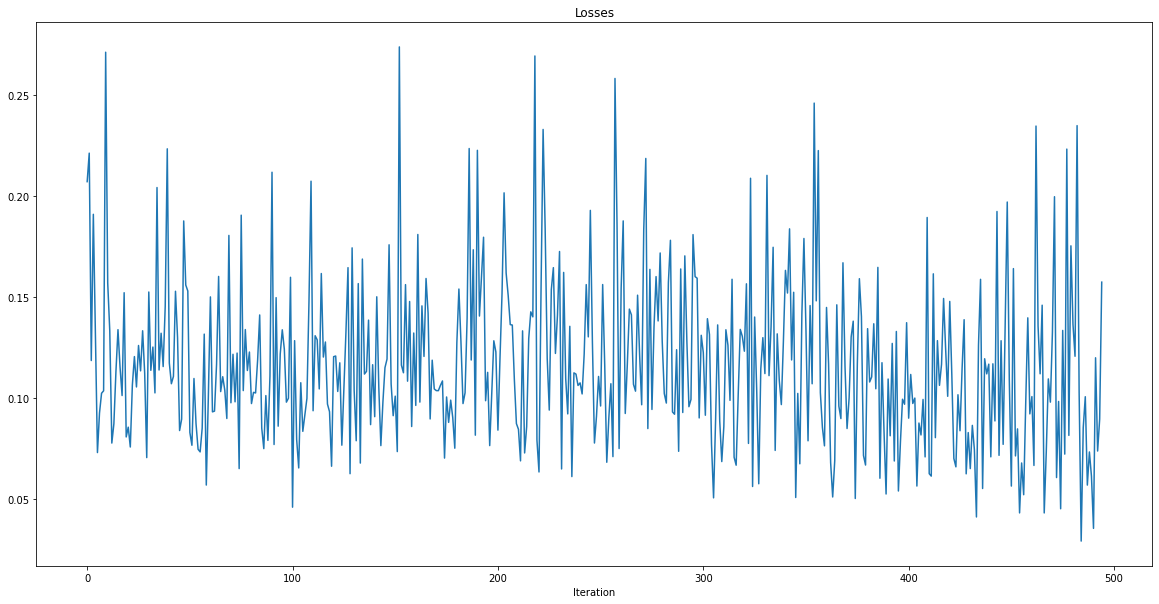

In [ ]:
#plot the losses
losses = losses[5:]
plt.figure(figsize=(20,10))
plt.plot(range(len(losses)), losses)
plt.title('Losses')
plt.xlabel('Iteration')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'losses.png'), dpi=300, facecolor='w')

plt.show()

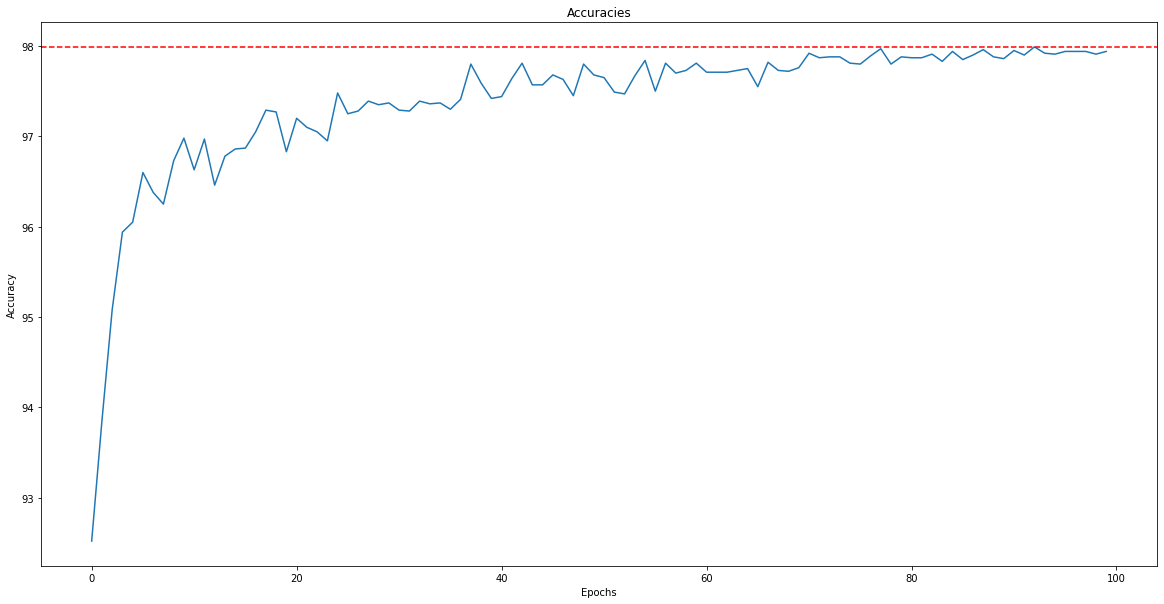

In [ ]:
#plot the accuracy in the 'setup.log' file
accuracies = []
with open('setup.log', 'r') as file:
    contents = file.read()
    pattern = r'validation accuracy\s+(\d+\.\d+)' 
    matches = re.findall(pattern, contents)
    accuracies = [float(match) for match in matches]
    
plt.figure(figsize=(20,10))
plt.plot(range(len(accuracies)), accuracies)
#plot a line at the best accuracy
plt.axhline(y=max(accuracies), color='r', linestyle='--')
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies.png'), dpi=300, facecolor='w')

plt.show()

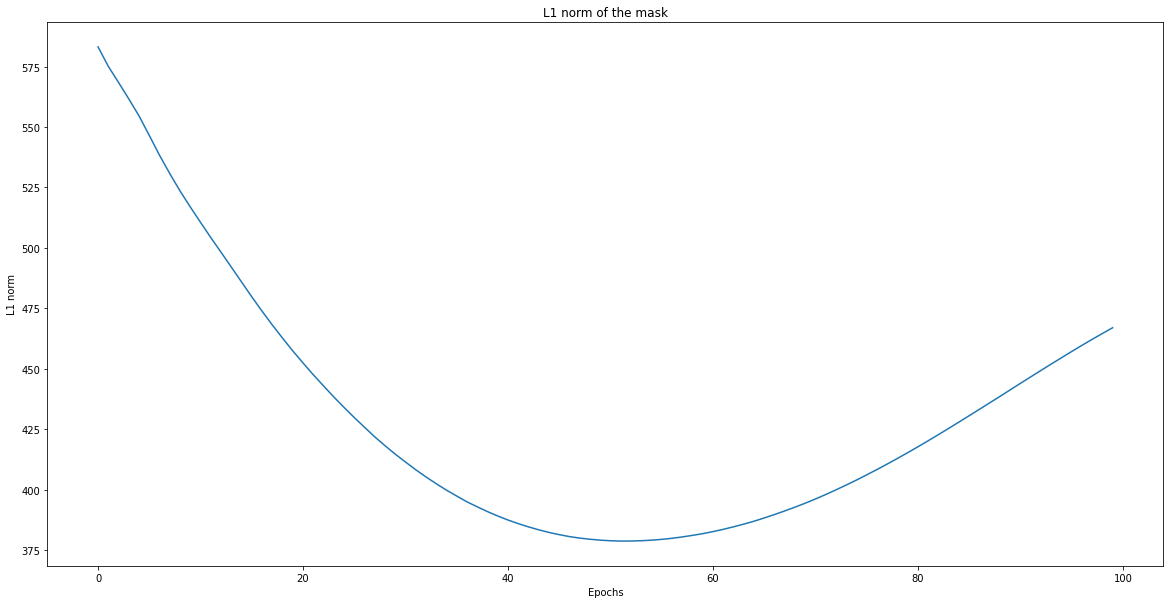

In [ ]:
l1_list = [epoch_data[1] for epoch_data in epochs_data]

#plot the l1_list
plt.figure(figsize=(20,10))
plt.plot(range(len(l1_list)), l1_list)
plt.title('L1 norm of the mask')
plt.xlabel('Epochs')
plt.ylabel('L1 norm')

#save the figure
plt.savefig(os.path.join(saving_dir, 'l1_norm.png'), dpi=300, facecolor='w')

plt.show()

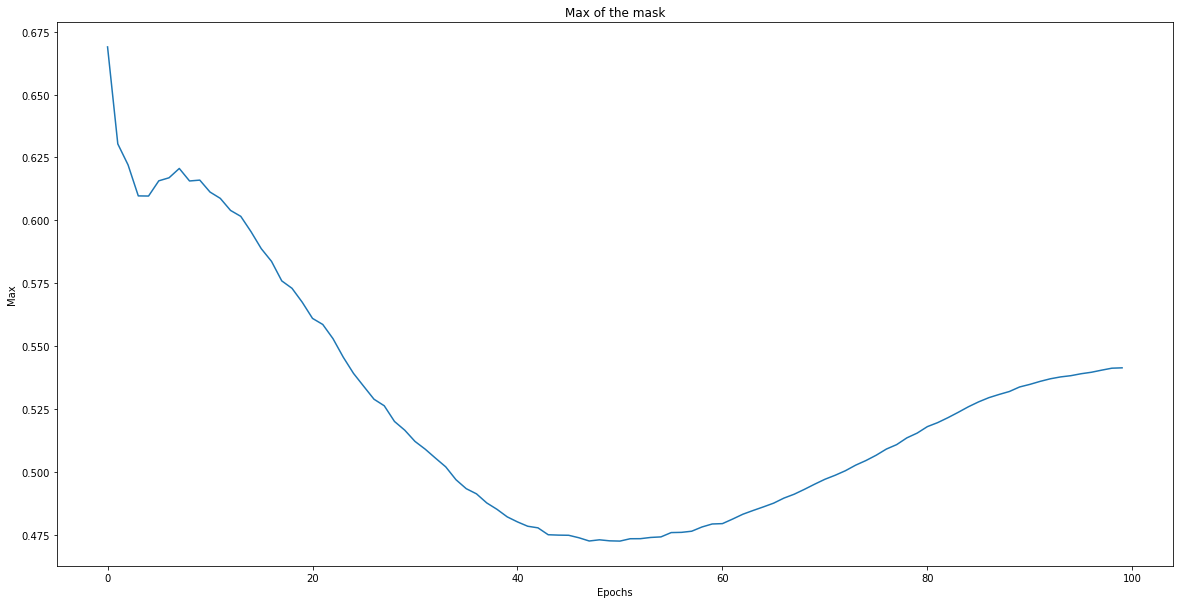

In [ ]:
#same with maxi_list
maxi_list = [epoch_data[3] for epoch_data in epochs_data]

#plot the maxi_list
plt.figure(figsize=(20,10))
plt.plot(range(len(maxi_list)), maxi_list)
plt.title('Max of the mask')
plt.xlabel('Epochs')
plt.ylabel('Max')

#save the figure
plt.savefig(os.path.join(saving_dir, 'max.png'), dpi=300, facecolor='w')

plt.show()

# Comparison between BiP and pen_bip_1 on a certain segment.

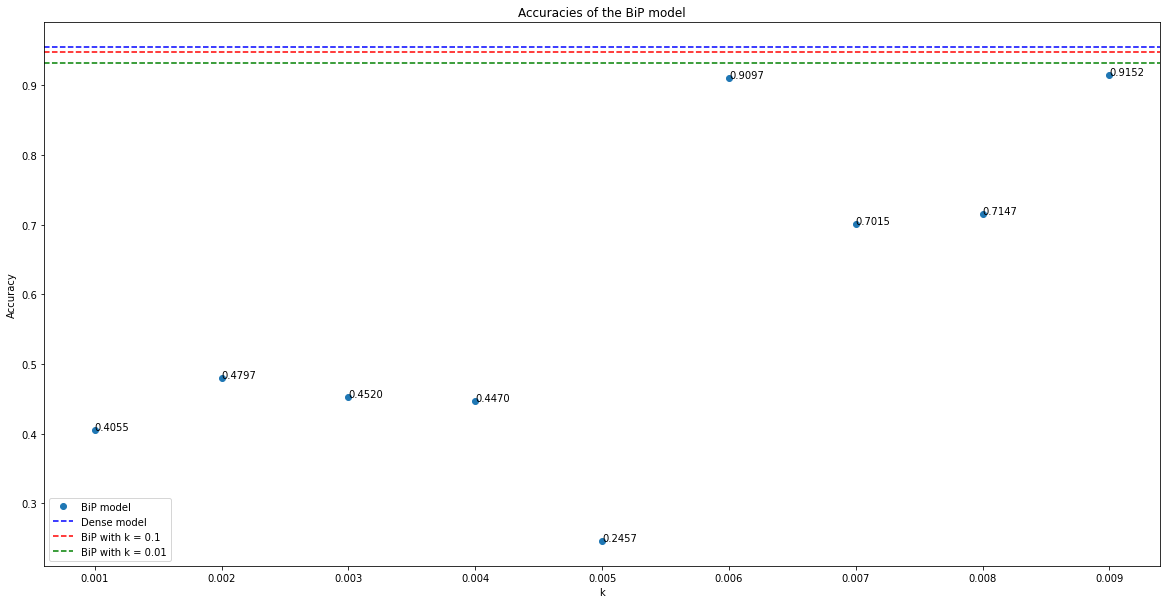

In [ ]:
ks = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
accuracies_bip = [0.4055, 0.4797, 0.452, 0.447, 0.2457, 0.9097,0.7015, 0.7147, 0.9152]
dense_model = 0.955
bip_01 = 0.947
bip_001 = 0.9325

#plot the accuracies of the bip model
plt.figure(figsize=(20,10))
plt.plot(ks, accuracies_bip, 'o', label='BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')
#annotate the points with their value of accuracy:
for i, k in enumerate(ks):
    plt.annotate('{:.4f}'.format(accuracies_bip[i]), (k, accuracies_bip[i]))


plt.title('Accuracies of the BiP model')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_bip.png'), dpi=300, facecolor='w')

plt.show()


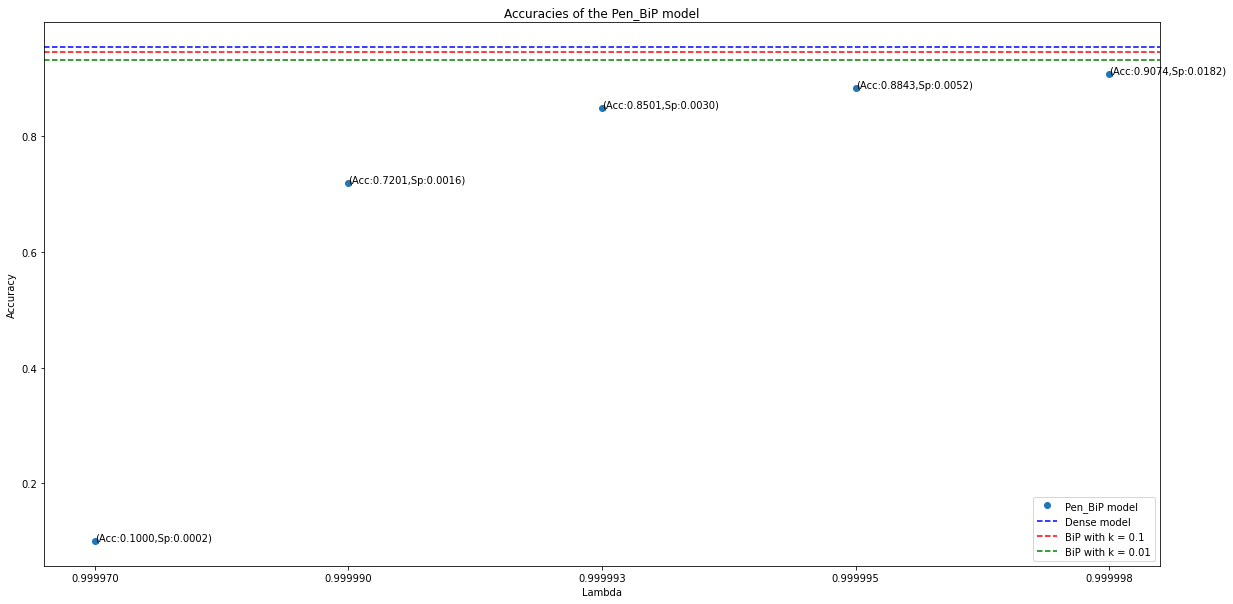

In [ ]:
ls = ['0.999970', '0.999990', '0.999993', '0.999995', '0.999998']
accuracies_pen_bip_1 = [0.1, 0.72009, 0.85009, 0.8843, 0.9074]
sparsities_pen_bip_1 = [1758/n, 17364/n ,33415/n, 58584/n, 203157/n]

#plot the accuracies of the pen_bip_1 model
plt.figure(figsize=(20,10))
plt.plot(ls, accuracies_pen_bip_1, 'o', label='Pen_BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')

#annotate each point with the values of (accuracy,sparsity)
for i, l in enumerate(ls):
    plt.annotate('(Acc:{:.4f},Sp:{:.4f})'.format(accuracies_pen_bip_1[i], sparsities_pen_bip_1[i]), (l, accuracies_pen_bip_1[i]))

plt.title('Accuracies of the Pen_BiP model')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_pen_bip_1.png'), dpi=300, facecolor='w')

plt.show()

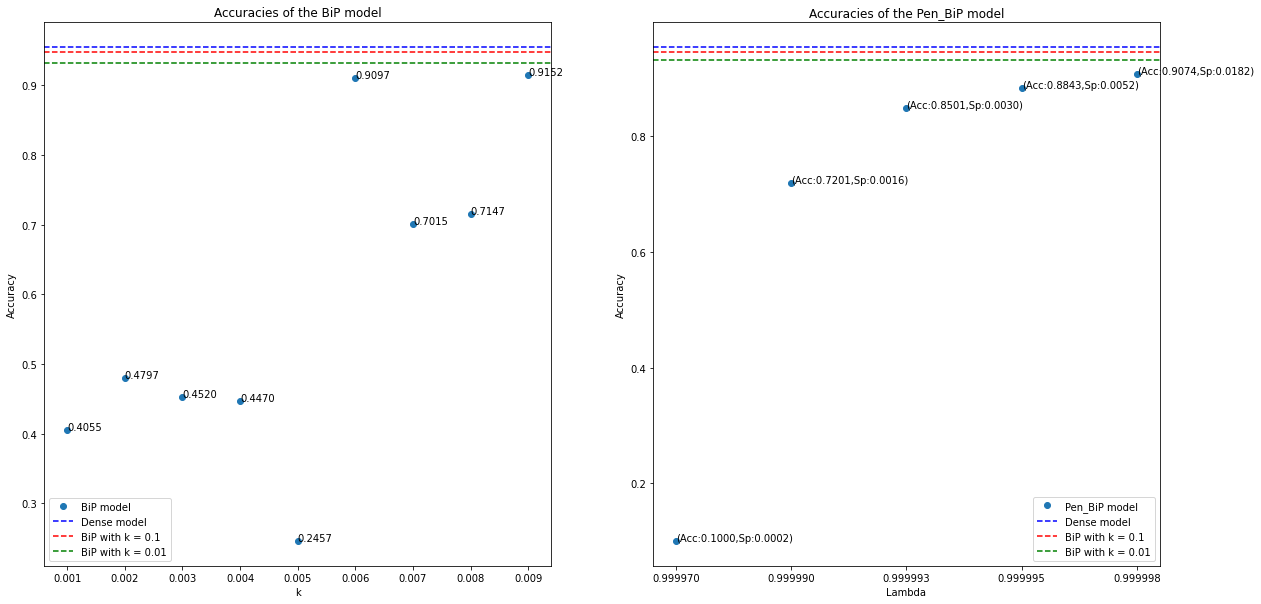

In [ ]:
#do a big plot, with two subplots in it (left and right)
#one plot is the accuracies of the bip model
#the other is the accuracies of the pen_bip_1 model

#plot the accuracies of the bip model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(ks, accuracies_bip, 'o', label='BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')
#annotate the points with their value of accuracy:
for i, k in enumerate(ks):
    plt.annotate('{:.4f}'.format(accuracies_bip[i]), (k, accuracies_bip[i]))

plt.title('Accuracies of the BiP model')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#plot the accuracies of the pen_bip_1 model
plt.subplot(1,2,2)
plt.plot(ls, accuracies_pen_bip_1, 'o', label='Pen_BiP model')

#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')

#annotate each point with the values of (accuracy,sparsity)
for i, l in enumerate(ls):
    plt.annotate('(Acc:{:.4f},Sp:{:.4f})'.format(accuracies_pen_bip_1[i], sparsities_pen_bip_1[i]), (l, accuracies_pen_bip_1[i]))

plt.title('Accuracies of the Pen_BiP model')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_bip_pen_bip_1.png'), dpi=300, facecolor='w')

plt.show()

# Experiences with alphas

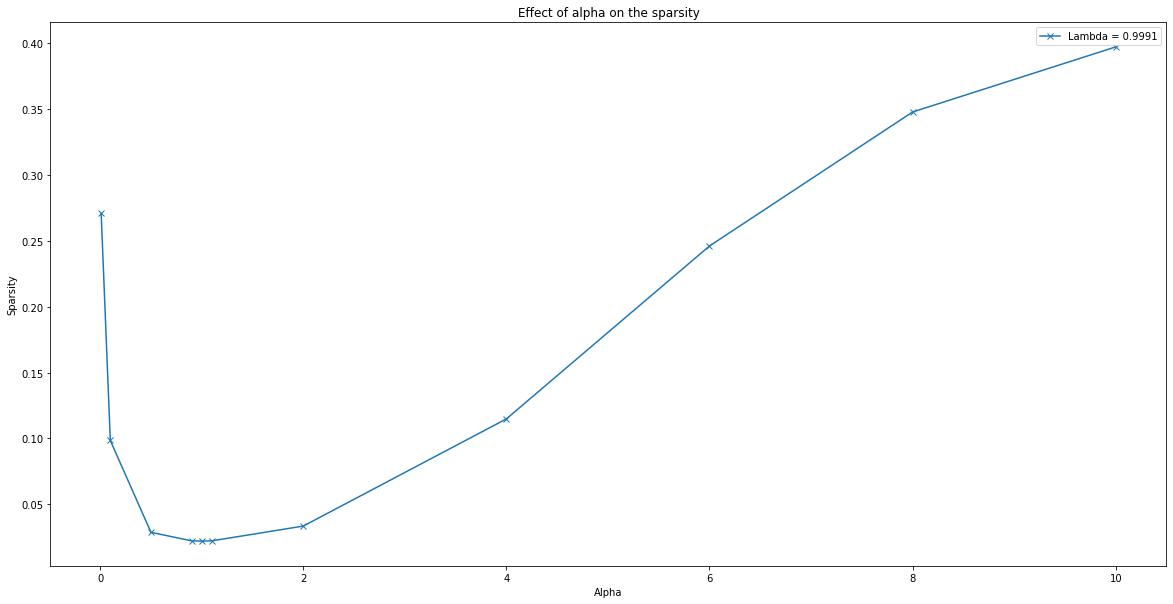

In [ ]:
n_mnist = 166248
alphas = [0.01, 0.1, 0.5, 0.9, 1, 1.1, 2, 4, 6, 8, 10]
l0_norms = [45000/n_mnist, 16362/n_mnist, 4782/n_mnist, 3702/n_mnist, 3672/n_mnist, 3704/n_mnist, 5566/n_mnist, 19087/n_mnist,40902/n_mnist,57805/n_mnist ,66015/n_mnist]

#plot the l0 norms of the bip model
#with a cross on the points (alpha, l0_norm)
plt.figure(figsize=(20,10))
plt.plot(alphas, l0_norms, '-x', label='Lambda = 0.9991')

plt.xlabel('Alpha')
plt.ylabel('Sparsity')
plt.title('Effect of alpha on the sparsity')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'l0_norms_bip.png'), dpi=300, facecolor='w')

plt.show()

# Duality gap bis

In [ ]:
#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
duality_gaps = np.concatenate([epoch_data[-2] for epoch_data in epochs_data])
losses = [epoch_data[-1][0] for epoch_data in epochs_data]

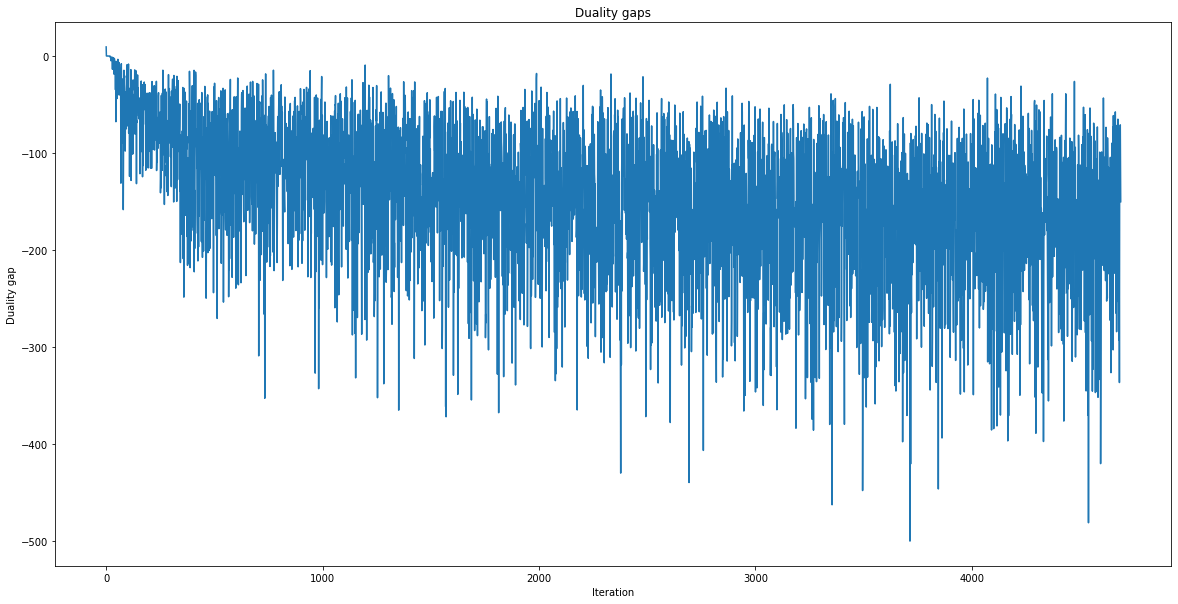

In [ ]:
#plot the duality gaps
plt.figure(figsize=(20,10))
plt.plot(range(len(duality_gaps)), duality_gaps)
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps.png'), dpi=300, facecolor='w')

plt.show()

# Comparison between increasing number LL steps and 1 LL step

# BiP

In [3]:
#open the files
epochs_data_b = np.load('b/epochs_data.npy', allow_pickle=True)
epochs_data_bi = np.load('bi/epochs_data.npy', allow_pickle=True)
epochs_data_pb = np.load('pb/epochs_data.npy', allow_pickle=True)
epochs_data_pbi = np.load('pbi/epochs_data.npy', allow_pickle=True)

#plot the comparisons between b and bi and between pb and pbi

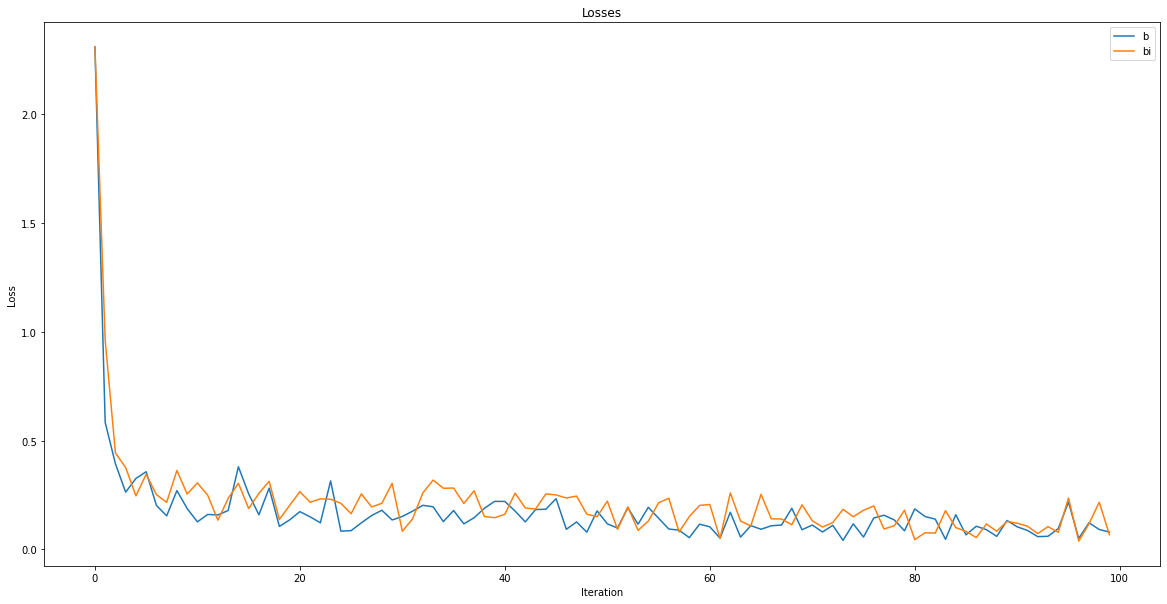

In [78]:
#between b and bi
losses_b = [epoch_data[0] for epoch_data in epochs_data_b]
losses_bi = [epoch_data[0] for epoch_data in epochs_data_bi]

#plot the losses
plt.figure(figsize=(20,10))
plt.plot(range(len(losses_b)), losses_b, label='b')
plt.plot(range(len(losses_bi)), losses_bi, label='bi')
plt.title('Losses')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'losses_b_bi.png'), dpi=300, facecolor='w')

plt.show()

[0.5403898358345032, 5.080435752868652, 4.230052471160889, 3.9994029998779297, 2.5516128540039062, 3.737814426422119, 3.816530227661133, 2.0607054233551025, 3.20554518699646, 1.1539239883422852, 1.7024645805358887, 1.1128844022750854, 1.2720670700073242, 5.096264839172363, 4.412193298339844, 5.681963920593262, 1.1386264562606812, 0.3013445734977722, 0.567757785320282, 0.6574981808662415, 2.5157976150512695, 1.7109339237213135, 0.3955896496772766, 6.228109836578369, 2.4151268005371094, 0.4566574692726135, 1.5664091110229492, 2.8585662841796875, 3.6506145000457764, 1.8102290630340576, 2.314880847930908, 1.789482831954956, 1.6202541589736938, 1.6808956861495972, 1.9276686906814575, 3.3181095123291016, 5.209135055541992, 1.9802660942077637, 1.8827767372131348, 4.672097682952881, 2.0389163494110107, 2.114187240600586, 2.5332276821136475, 2.133856773376465, 5.016279220581055, 1.626888394355774, 3.3450732231140137, 2.081191301345825, 1.9569008350372314, 3.0649075508117676, 1.139486312866211, 

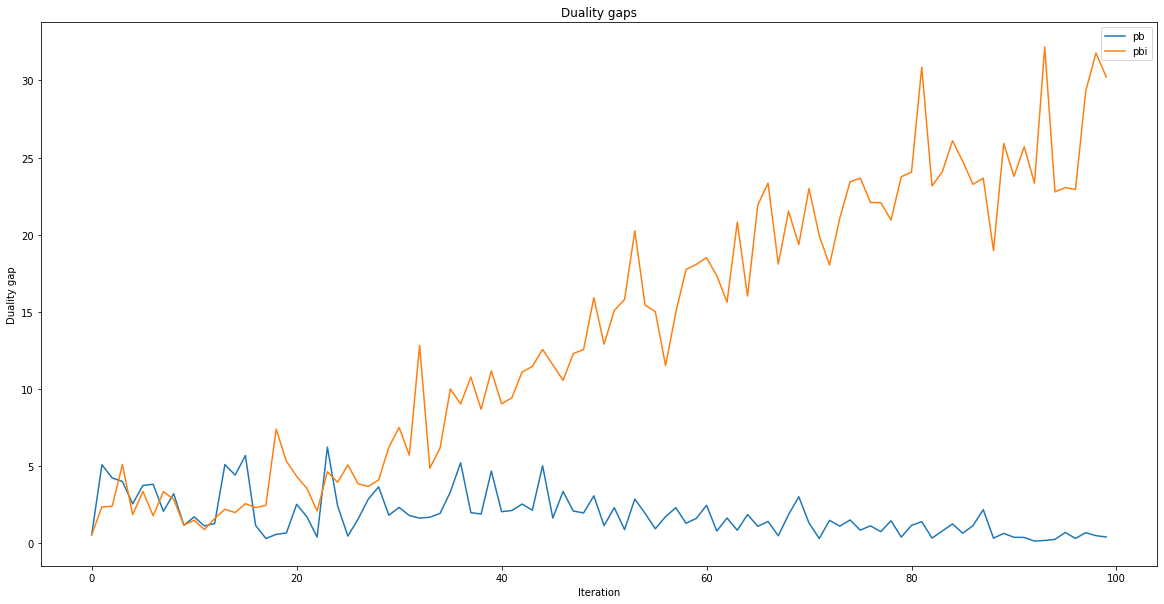

In [5]:
#between pb and pbi
pb_duality_gaps = [epoch_data[-2][0] for epoch_data in epochs_data_pb]
pbi_duality_gaps = [epoch_data[-2][0] for epoch_data in epochs_data_pbi]

print(pb_duality_gaps)
print(pbi_duality_gaps)
#plot the duality gaps
plt.figure(figsize=(20,10))
plt.plot(range(len(pb_duality_gaps)), pb_duality_gaps, label='pb')
plt.plot(range(len(pbi_duality_gaps)), pbi_duality_gaps, label='pbi')
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')
plt.legend()

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps_pb_pbi.png'), dpi=300, facecolor='w')

plt.show()

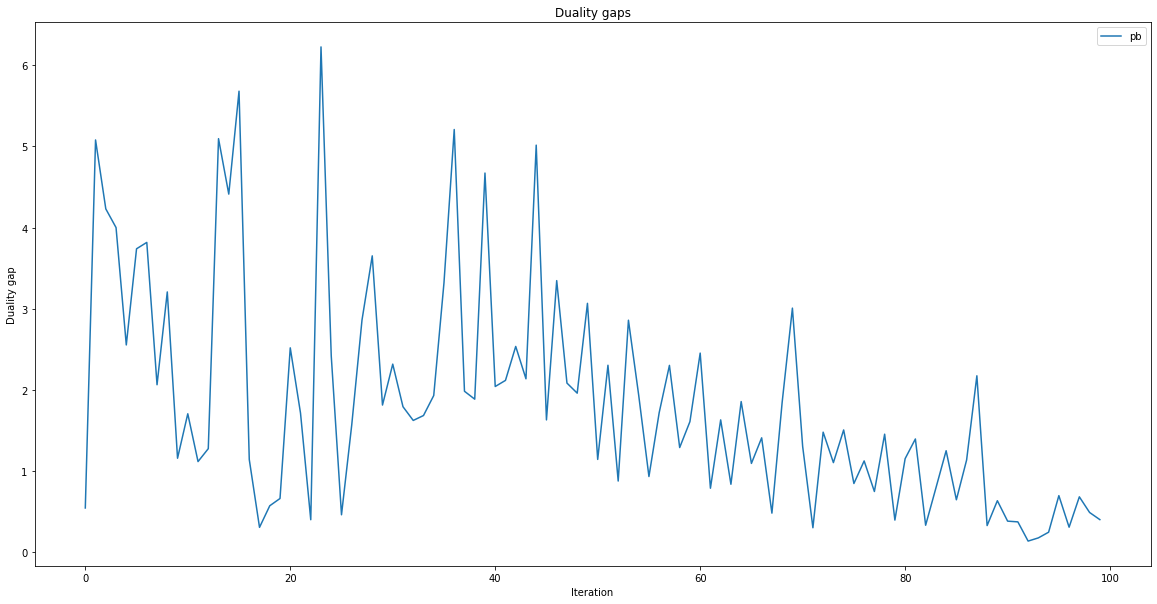

In [11]:
#print only the pb_duality_gaps curve

plt.figure(figsize=(20,10))
plt.plot(range(len(pb_duality_gaps)), pb_duality_gaps, label='pb')
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')
plt.legend()

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps_pb.png'), dpi=300, facecolor='w')

plt.show()


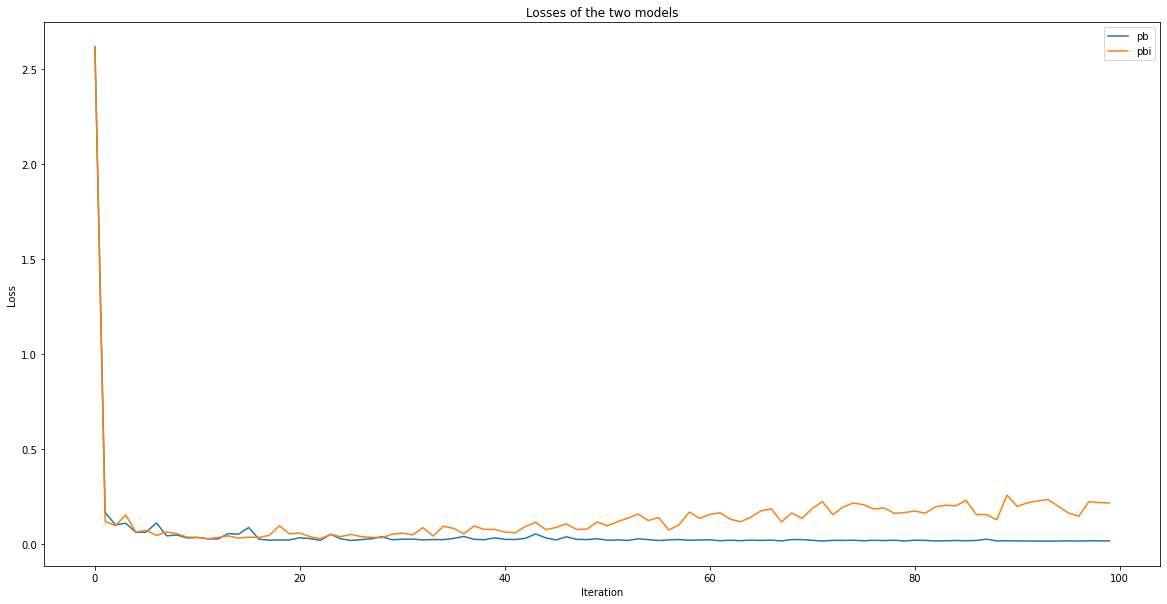

In [10]:
#compare the losses of the two models as well

#between pb and pbi
pb_losses = [epoch_data[-1][0] for epoch_data in epochs_data_pb]
pbi_losses = [epoch_data[-1][0] for epoch_data in epochs_data_pbi]


plt.figure(figsize=(20,10))
plt.plot(pb_losses, label='pb')
plt.plot(pbi_losses, label='pbi')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Losses of the two models')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'losses_pbi_pb.png'), dpi=300, facecolor='w')

plt.show()



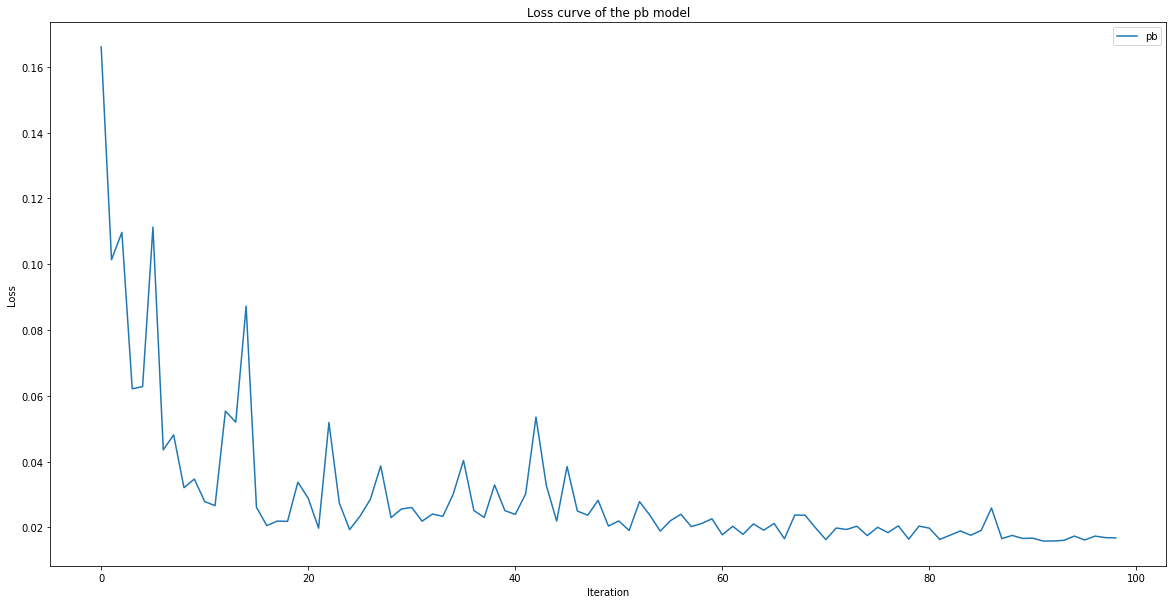

In [9]:
#plot only the losse curve of the pb model

plt.figure(figsize=(20,10))
plt.plot(pb_losses[1:], label='pb')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve of the pb model')
#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'losses_pb.png'), dpi=300, facecolor='w')

plt.show()

# Checking the first curve

In [25]:
epochs_data_check = np.load('check/epochs_data.npy', allow_pickle=True)

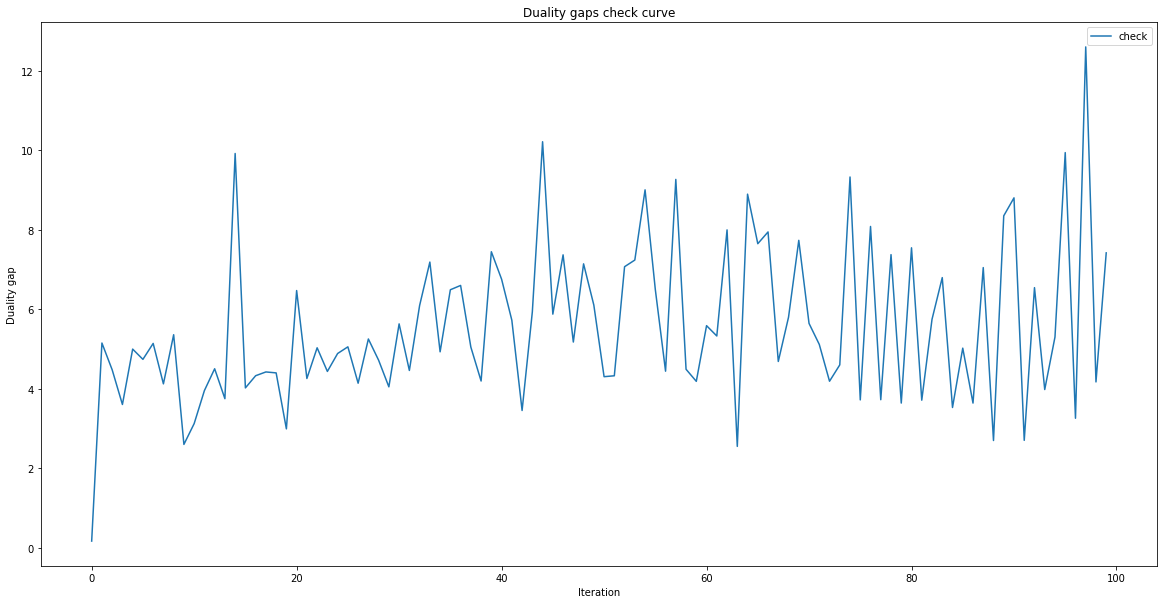

In [27]:
duality_gaps_check = [epoch_data[-1][0] for epoch_data in epochs_data_check]

#plot the duality gaps 
#lambda = 0.99991
#a=1

plt.figure(figsize=(20,10))
plt.plot(duality_gaps_check, label='check')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')
plt.legend()
plt.title('Duality gaps check curve')
#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'check.png'), dpi=300, facecolor='w')

plt.show()

In [33]:
print(epochs_data_check[1][0]/n_mnist)

0.02208748375920312


# Convergence comparison between different lambdas, on MNIST

In [28]:
epochs_data_5 = np.load('5/epochs_data.npy', allow_pickle=True)
epochs_data_6 = np.load('6/epochs_data.npy', allow_pickle=True)
epochs_data_7 = np.load('7/epochs_data.npy', allow_pickle=True)
epochs_data_8 = np.load('8/epochs_data.npy', allow_pickle=True)


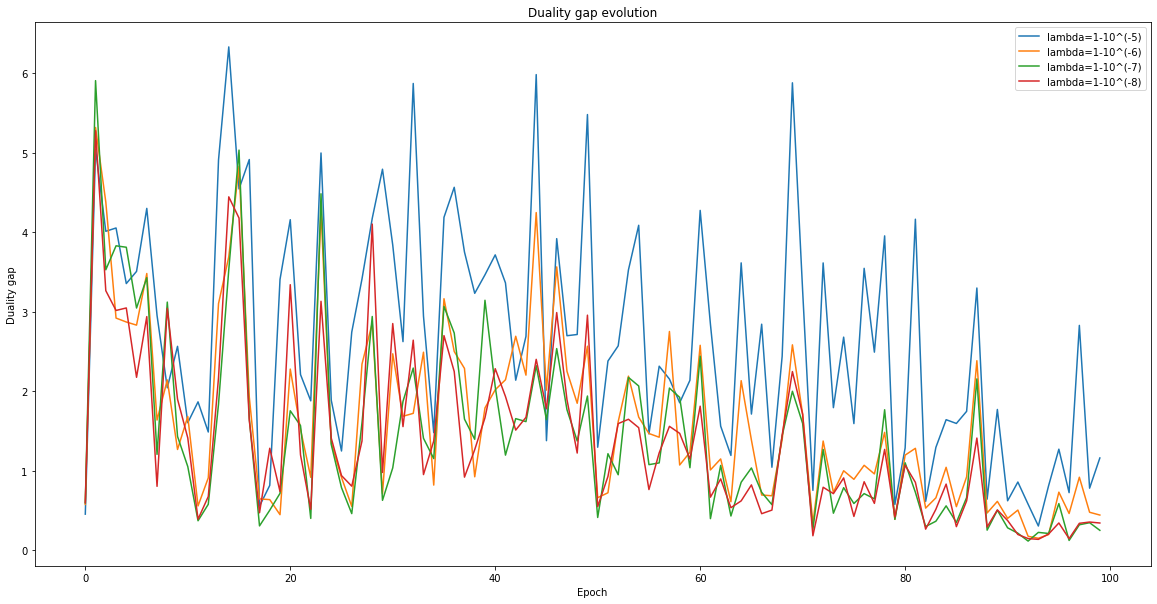

In [31]:
#plot the convergence results on the 4 lambdas values.
#in fact plot the duality gaps

duality_gaps_5 = [epoch_data[-2][0] for epoch_data in epochs_data_5]
duality_gaps_6 = [epoch_data[-2][0] for epoch_data in epochs_data_6]
duality_gaps_7 = [epoch_data[-2][0] for epoch_data in epochs_data_7]
duality_gaps_8 = [epoch_data[-2][0] for epoch_data in epochs_data_8]


plt.figure(figsize=(20, 10))
plt.plot(duality_gaps_5, label="lambda=1-10^(-5)")
plt.plot(duality_gaps_6, label="lambda=1-10^(-6)")
plt.plot(duality_gaps_7, label="lambda=1-10^(-7)")
plt.plot(duality_gaps_8, label="lambda=1-10^(-8)")
plt.xlabel('Epoch')
plt.ylabel('Duality gap')
plt.title('Duality gap evolution')

plt.legend()

#save the figure in the saving_dir
plt.savefig(os.path.join(saving_dir, 'comparison.png'), dpi=300, facecolor='w')

plt.show()

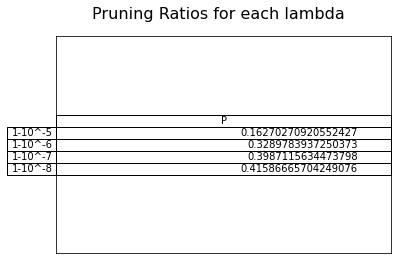

In [32]:
n_mnist = 166248
l0_norm_5 = epochs_data_5[1][0]
l0_norm_6 = epochs_data_6[1][0]
l0_norm_7 = epochs_data_7[1][0]
l0_norm_8 = epochs_data_8[1][0]

r5 = l0_norm_5 / n_mnist
r6 = l0_norm_6 / n_mnist
r7 = l0_norm_7 / n_mnist
r8 = l0_norm_8 / n_mnist

#plot a tab with the pruning ratios for each lambdas

# Data for the table
columns = ('Pruning Ratio')
rows = ['1-10^-5', '1-10^-6', '1-10^-7', '1-10^-8']
data = [[r5], [r6], [r7], [r8]]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Create the table
ax.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center')

# Add a title
fig.suptitle('Pruning Ratios for each lambda', fontsize=16)

#save the table
plt.savefig(os.path.join(saving_dir, 'pruning ratios comparison'), dpi=300, facecolor='w')

plt.show()

# Comparison of pb1 vs pb1_increasing vs pb1_armijo

# PB1 Increasing

In [35]:
#open the files in the folder pb1_increasing/
epochs_data_3 = np.load('pb1_increasing/3/epochs_data.npy', allow_pickle=True)
epochs_data_35 = np.load('pb1_increasing/35/epochs_data.npy', allow_pickle=True
epochs_data_4 = np.load('pb1_increasing/4/epochs_data.npy', allow_pickle=True)
epochs_data_5 = np.load('pb1_increasing/5/epochs_data.npy', allow_pickle=True)
epochs_data_6 = np.load('pb1_increasing/6/epochs_data.npy', allow_pickle=True)
epochs_data_7 = np.load('pb1_increasing/7/epochs_data.npy', allow_pickle=True)
epochs_data_8 = np.load('pb1_increasing/8/epochs_data.npy', allow_pickle=True)

In [36]:
duality_gaps_3 = [epoch_data[-2][0] for epoch_data in epochs_data_3]
duality_gaps_35 = [epoch_data[-2][0] for epoch_data in epochs_data_35]
duality_gaps_4 = [epoch_data[-2][0] for epoch_data in epochs_data_4]
duality_gaps_5 = [epoch_data[-2][0] for epoch_data in epochs_data_5]
duality_gaps_6 = [epoch_data[-2][0] for epoch_data in epochs_data_6]
duality_gaps_7 = [epoch_data[-2][0] for epoch_data in epochs_data_7]
duality_gaps_8 = [epoch_data[-2][0] for epoch_data in epochs_data_8]

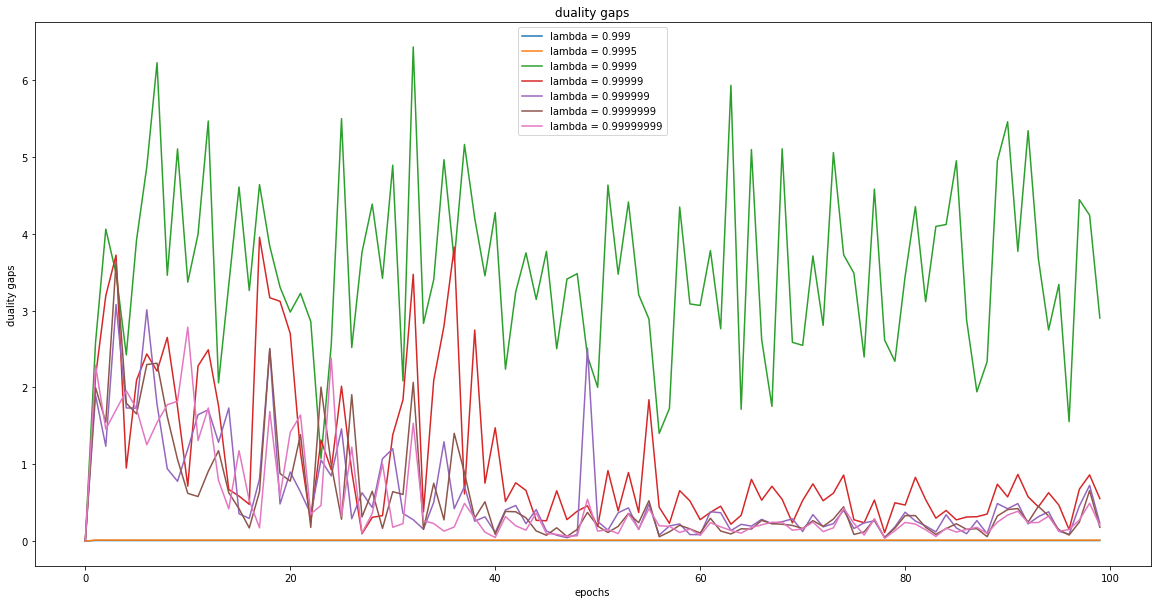

In [37]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("duality gaps")
plt.xlabel("epochs")
plt.ylabel("duality gaps")
plt.plot(duality_gaps_3, label="lambda = 0.999")
plt.plot(duality_gaps_35, label="lambda = 0.9995")
plt.plot(duality_gaps_4, label="lambda = 0.9999")
plt.plot(duality_gaps_5, label="lambda = 0.99999")
plt.plot(duality_gaps_6, label="lambda = 0.999999")
plt.plot(duality_gaps_7, label="lambda = 0.9999999")
plt.plot(duality_gaps_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1_Increasing Duality Gaps'), dpi=300, facecolor='w')

#show figure
plt.show()

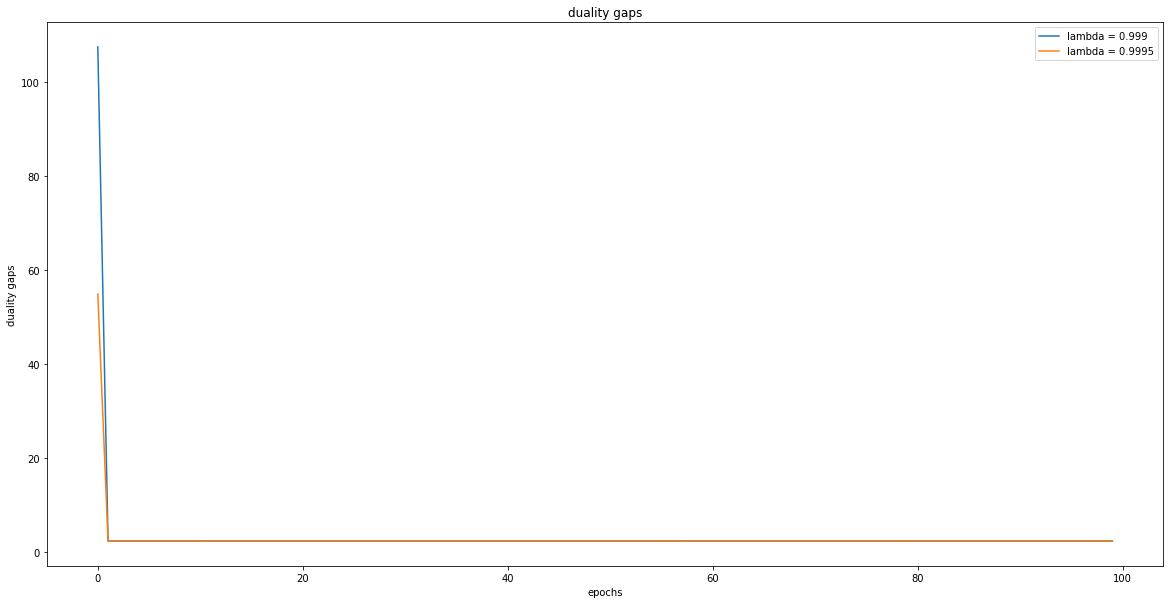

[107.38517761230469, 2.301833391189575, 2.2997987270355225, 2.294806480407715, 2.2987422943115234, 2.307300090789795, 2.294187307357788, 2.30475115776062, 2.3042027950286865, 2.2932071685791016, 2.3159546852111816, 2.307494640350342, 2.306082248687744, 2.2943809032440186, 2.300760269165039, 2.3104939460754395, 2.299344301223755, 2.2906033992767334, 2.3079328536987305, 2.2957427501678467, 2.295691728591919, 2.2996299266815186, 2.295280694961548, 2.3007137775421143, 2.296882390975952, 2.290353536605835, 2.3005447387695312, 2.2991251945495605, 2.304595708847046, 2.2963290214538574, 2.294330596923828, 2.299247980117798, 2.3051822185516357, 2.2987706661224365, 2.3069872856140137, 2.30029559135437, 2.297114849090576, 2.3120758533477783, 2.3108997344970703, 2.2926244735717773, 2.2978029251098633, 2.3044161796569824, 2.30434513092041, 2.3012757301330566, 2.2974140644073486, 2.29978084564209, 2.2853004932403564, 2.308049440383911, 2.300142765045166, 2.298473358154297, 2.3147079944610596, 2.2917

In [69]:
plt.figure(figsize=(20,10))
plt.title("duality gaps")
plt.xlabel("epochs")
plt.ylabel("duality gaps")
plt.plot(duality_gaps_3, label="lambda = 0.999")
plt.plot(duality_gaps_35, label="lambda = 0.9995")
plt.legend()

plt.show()
print(duality_gaps_3)

In [70]:
losses_3 = [epoch_data[-1][0] for epoch_data in epochs_data_3][2:]
losses_35 = [epoch_data[-1][0] for epoch_data in epochs_data_35][2:]
losses_4 = [epoch_data[-1][0] for epoch_data in epochs_data_4][2:]
losses_5 = [epoch_data[-1][0] for epoch_data in epochs_data_5][2:]
losses_6 = [epoch_data[-1][0] for epoch_data in epochs_data_6][2:]
losses_7 = [epoch_data[-1][0] for epoch_data in epochs_data_7][2:]
losses_8 = [epoch_data[-1][0] for epoch_data in epochs_data_8][2:]

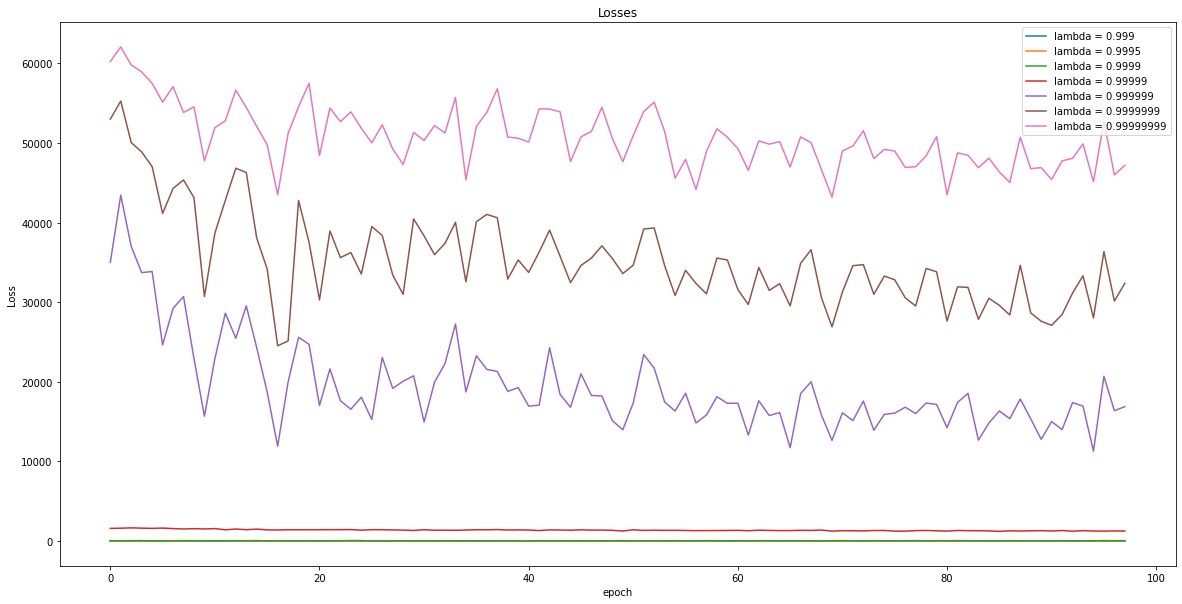

In [71]:
#plot on a same figure all the losses with their labels:

plt.figure(figsize=(20,10))
plt.title("Losses")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.plot(losses_3, label="lambda = 0.999")
plt.plot(losses_35, label="lambda = 0.9995")
plt.plot(losses_4, label="lambda = 0.9999")
plt.plot(losses_5, label="lambda = 0.99999")
plt.plot(losses_6, label="lambda = 0.999999")
plt.plot(losses_7, label="lambda = 0.9999999")
plt.plot(losses_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1_Increasing Losses'), dpi=300, facecolor='w')

#show figure
plt.show()

# PB1

In [97]:
#open the files in the folder pb1/
epochs_data_2 = np.load('pb1/2/epochs_data.npy', allow_pickle=True)
epochs_data_3 = np.load('pb1/3/epochs_data.npy', allow_pickle=True)
epochs_data_4 = np.load('pb1/4/epochs_data.npy', allow_pickle=True)
epochs_data_5 = np.load('pb1/5/epochs_data.npy', allow_pickle=True)
epochs_data_6 = np.load('pb1/6/epochs_data.npy', allow_pickle=True)
epochs_data_7 = np.load('pb1/7/epochs_data.npy', allow_pickle=True)
epochs_data_8 = np.load('pb1/8/epochs_data.npy', allow_pickle=True)
epochs_data_98 = np.load('pb1/98/epochs_data.npy', allow_pickle=True)

In [111]:
duality_gaps_2 = [epoch_data[-3][2] for epoch_data in epochs_data_2][2:]
duality_gaps_3 = [epoch_data[-3][0] for epoch_data in epochs_data_3][2:]
duality_gaps_4 = [epoch_data[-3][0] for epoch_data in epochs_data_4][2:]
duality_gaps_5 = [epoch_data[-3][0] for epoch_data in epochs_data_5][2:]
duality_gaps_6 = [epoch_data[-3][0] for epoch_data in epochs_data_6][2:]
duality_gaps_7 = [epoch_data[-3][0] for epoch_data in epochs_data_7][2:]
duality_gaps_8 = [epoch_data[-3][0] for epoch_data in epochs_data_8][2:]
duality_gaps_98 = [epoch_data[-3][0] for epoch_data in epochs_data_98][2:]

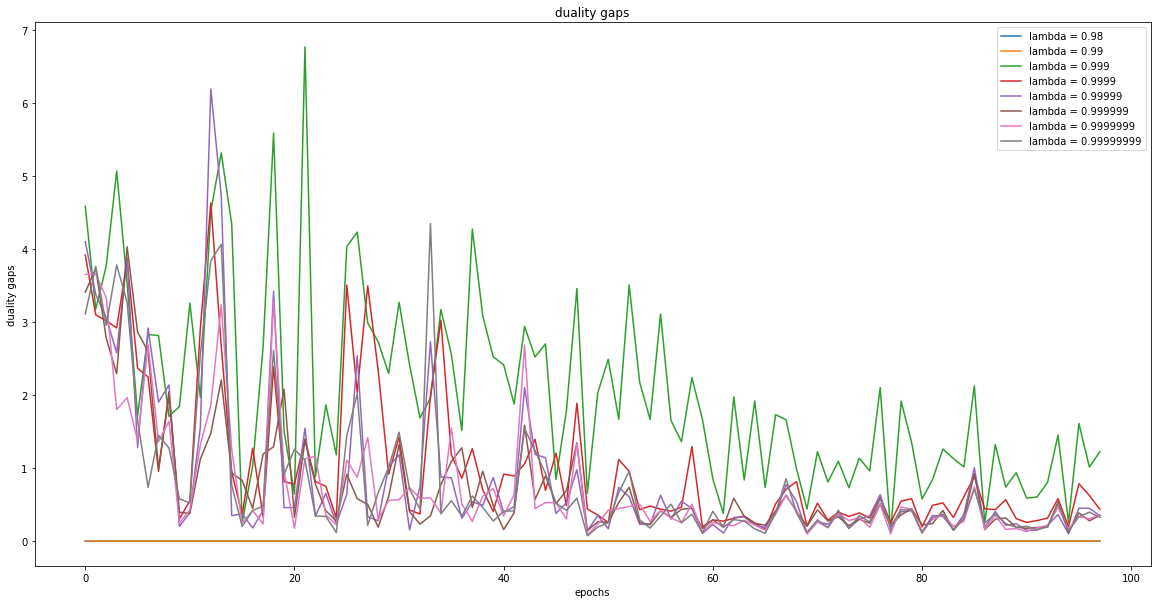

In [114]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("duality gaps")
plt.xlabel("epochs")
plt.ylabel("duality gaps")
plt.plot(duality_gaps_98, label="lambda = 0.98")
plt.plot(duality_gaps_2, label="lambda = 0.99")
plt.plot(duality_gaps_3, label="lambda = 0.999")
plt.plot(duality_gaps_4, label="lambda = 0.9999")
plt.plot(duality_gaps_5, label="lambda = 0.99999")
plt.plot(duality_gaps_6, label="lambda = 0.999999")
plt.plot(duality_gaps_7, label="lambda = 0.9999999")
plt.plot(duality_gaps_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Duality Gaps'), dpi=300, facecolor='w')

#show figure
plt.show()

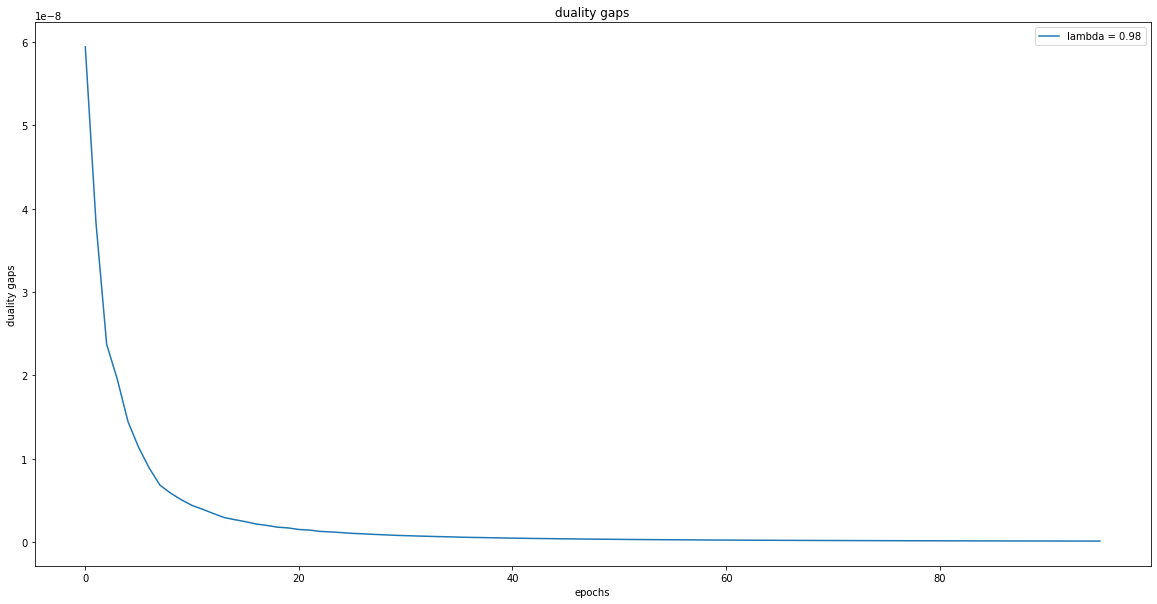

In [113]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("duality gaps")
plt.xlabel("epochs")
plt.ylabel("duality gaps")
plt.plot(duality_gaps_98[2:], label="lambda = 0.98")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Particular One'), dpi=300, facecolor='w')

#show figure
plt.show()

In [49]:
losses_3 = [epoch_data[-2][0] for epoch_data in epochs_data_3][2:]
losses_35 = [epoch_data[-2][0] for epoch_data in epochs_data_35][2:]
losses_4 = [epoch_data[-2][0] for epoch_data in epochs_data_4][2:]
losses_5 = [epoch_data[-2][0] for epoch_data in epochs_data_5][2:]
losses_6 = [epoch_data[-2][0] for epoch_data in epochs_data_6][2:]
losses_7 = [epoch_data[-2][0] for epoch_data in epochs_data_7][2:]
losses_8 = [epoch_data[-2][0] for epoch_data in epochs_data_8][2:]

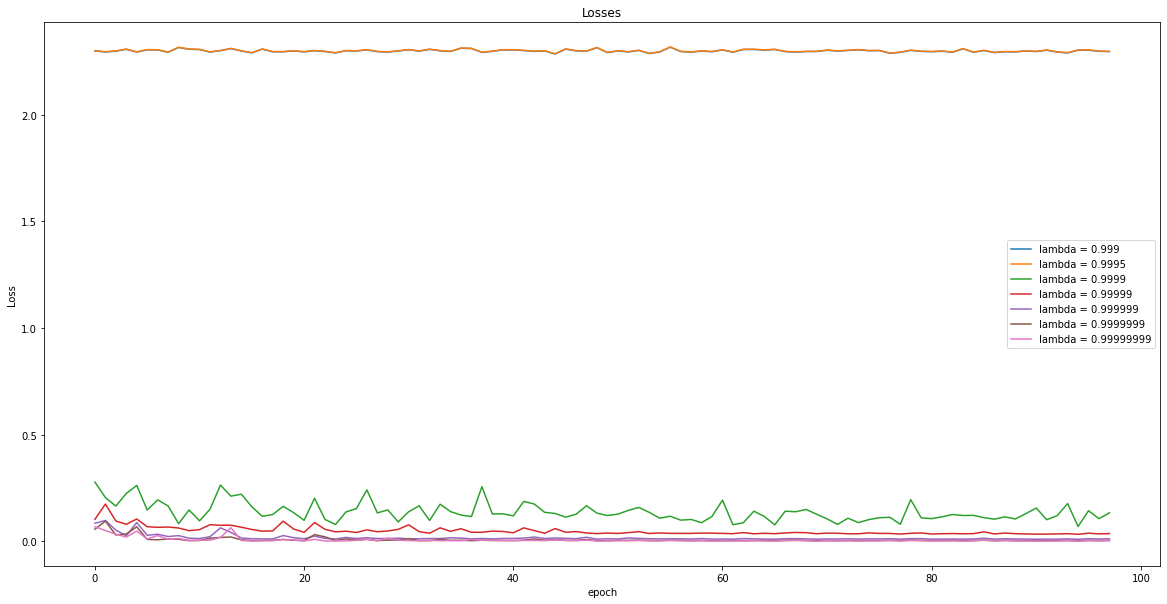

In [50]:
#plot on a same figure all losses with their labels:

plt.figure(figsize=(20,10))
plt.title("Losses")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.plot(losses_3, label="lambda = 0.999")
plt.plot(losses_35, label="lambda = 0.9995")
plt.plot(losses_4, label="lambda = 0.9999")
plt.plot(losses_5, label="lambda = 0.99999")
plt.plot(losses_6, label="lambda = 0.999999")
plt.plot(losses_7, label="lambda = 0.9999999")
plt.plot(losses_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Losses'), dpi=300, facecolor='w')

#show figure
plt.show()

In [51]:
supports_3 = [epoch_data[-1][0] for epoch_data in epochs_data_3]
supports_35 = [epoch_data[-1][0] for epoch_data in epochs_data_35]
supports_4 = [epoch_data[-1][0] for epoch_data in epochs_data_4]
supports_5 = [epoch_data[-1][0] for epoch_data in epochs_data_5]
supports_6 = [epoch_data[-1][0] for epoch_data in epochs_data_6]
supports_7 = [epoch_data[-1][0] for epoch_data in epochs_data_7]
supports_8 = [epoch_data[-1][0] for epoch_data in epochs_data_8]

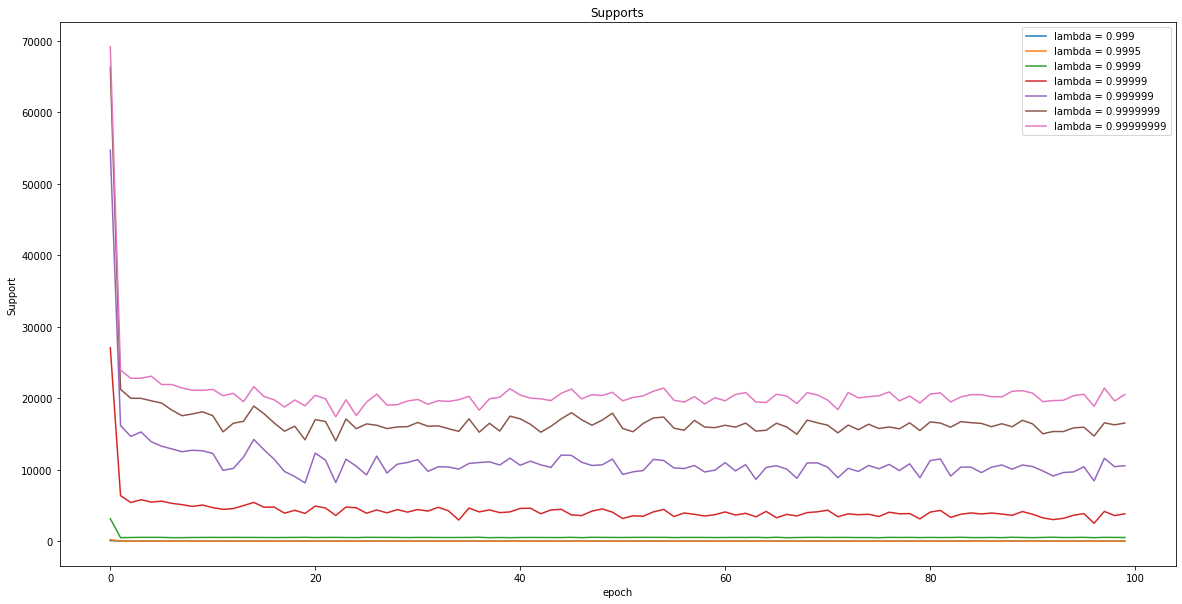

In [52]:
#plot on a same figure all supports with their labels:

plt.figure(figsize=(20,10))
plt.title("Supports")
plt.xlabel("epoch")
plt.ylabel("Support")
plt.plot(supports_3, label="lambda = 0.999")
plt.plot(supports_35, label="lambda = 0.9995")
plt.plot(supports_4, label="lambda = 0.9999")
plt.plot(supports_5, label="lambda = 0.99999")
plt.plot(supports_6, label="lambda = 0.999999")
plt.plot(supports_7, label="lambda = 0.9999999")
plt.plot(supports_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Supports'), dpi=300, facecolor='w')

#show figure
plt.show()

In [76]:
max_4 = [epoch_data[3] for epoch_data in epochs_data_4]
max_5 = [epoch_data[3] for epoch_data in epochs_data_5]
max_6 = [epoch_data[3] for epoch_data in epochs_data_6]
max_7 = [epoch_data[3] for epoch_data in epochs_data_7]
max_8 = [epoch_data[3] for epoch_data in epochs_data_8]

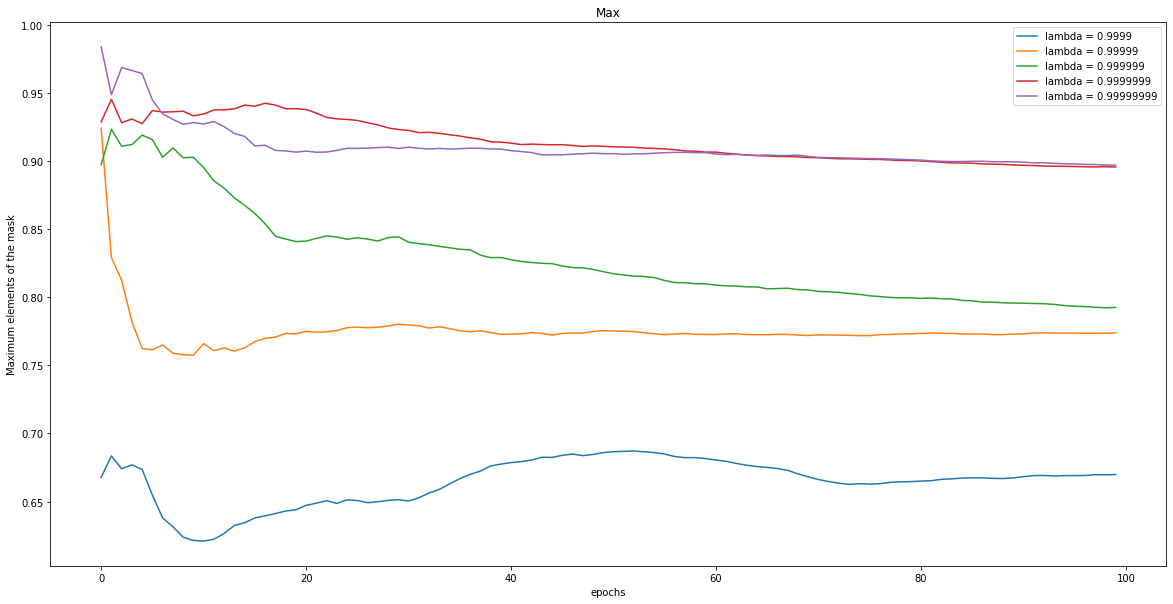

In [77]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("Max")
plt.xlabel("epochs")
plt.ylabel("Maximum elements of the mask")
plt.plot(max_4, label="lambda = 0.9999")
plt.plot(max_5, label="lambda = 0.99999")
plt.plot(max_6, label="lambda = 0.999999")
plt.plot(max_7, label="lambda = 0.9999999")
plt.plot(max_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Maximum elements'), dpi=300, facecolor='w')

#show figure
plt.show()

# PB1 armijo

In [72]:
#open the files in the folder pb1_armijo/
epochs_data_4 = np.load('pb1_armijo/4/epochs_data.npy', allow_pickle=True)
epochs_data_5 = np.load('pb1_armijo/5/epochs_data.npy', allow_pickle=True)
epochs_data_6 = np.load('pb1_armijo/6/epochs_data.npy', allow_pickle=True)
epochs_data_7 = np.load('pb1_armijo/7/epochs_data.npy', allow_pickle=True)
epochs_data_8 = np.load('pb1_armijo/8/epochs_data.npy', allow_pickle=True)

In [55]:
duality_gaps_4 = [epoch_data[-4][0] for epoch_data in epochs_data_4]
duality_gaps_5 = [epoch_data[-4][0] for epoch_data in epochs_data_5]
duality_gaps_6 = [epoch_data[-4][0] for epoch_data in epochs_data_6]
duality_gaps_7 = [epoch_data[-4][0] for epoch_data in epochs_data_7]
duality_gaps_8 = [epoch_data[-4][0] for epoch_data in epochs_data_8]

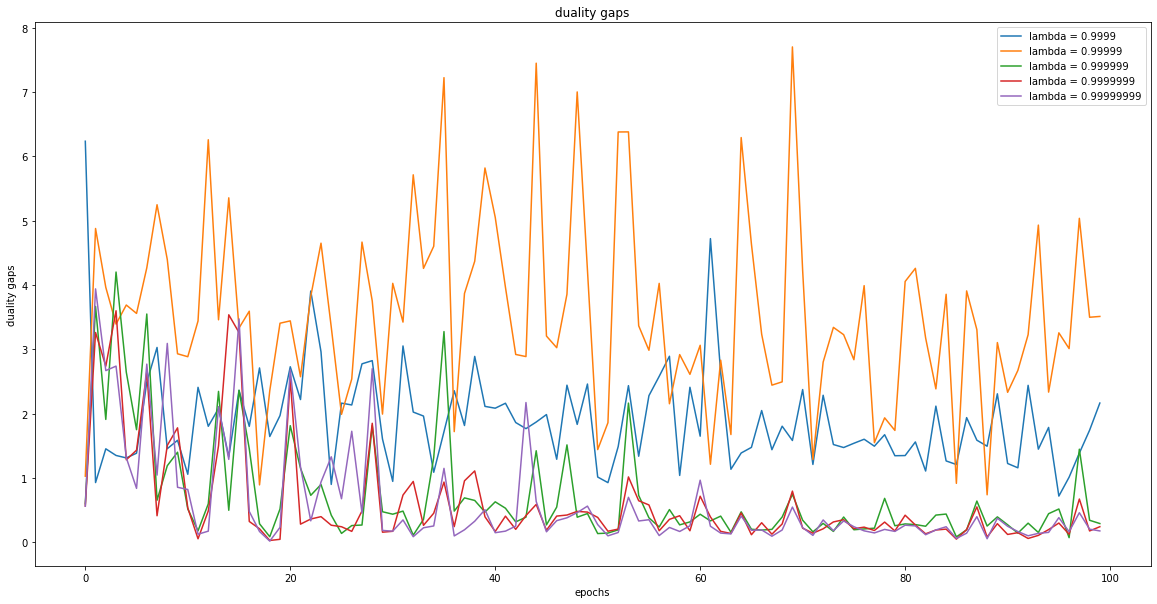

In [56]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("duality gaps")
plt.xlabel("epochs")
plt.ylabel("duality gaps")
plt.plot(duality_gaps_4, label="lambda = 0.9999")
plt.plot(duality_gaps_5, label="lambda = 0.99999")
plt.plot(duality_gaps_6, label="lambda = 0.999999")
plt.plot(duality_gaps_7, label="lambda = 0.9999999")
plt.plot(duality_gaps_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Armijo Duality Gaps'), dpi=300, facecolor='w')

#show figure
plt.show()

In [59]:
losses_4 = [epoch_data[-3][0] for epoch_data in epochs_data_4][2:]
losses_5 = [epoch_data[-3][0] for epoch_data in epochs_data_5][2:]
losses_6 = [epoch_data[-3][0] for epoch_data in epochs_data_6][2:]
losses_7 = [epoch_data[-3][0] for epoch_data in epochs_data_7][2:]
losses_8 = [epoch_data[-3][0] for epoch_data in epochs_data_8][2:]

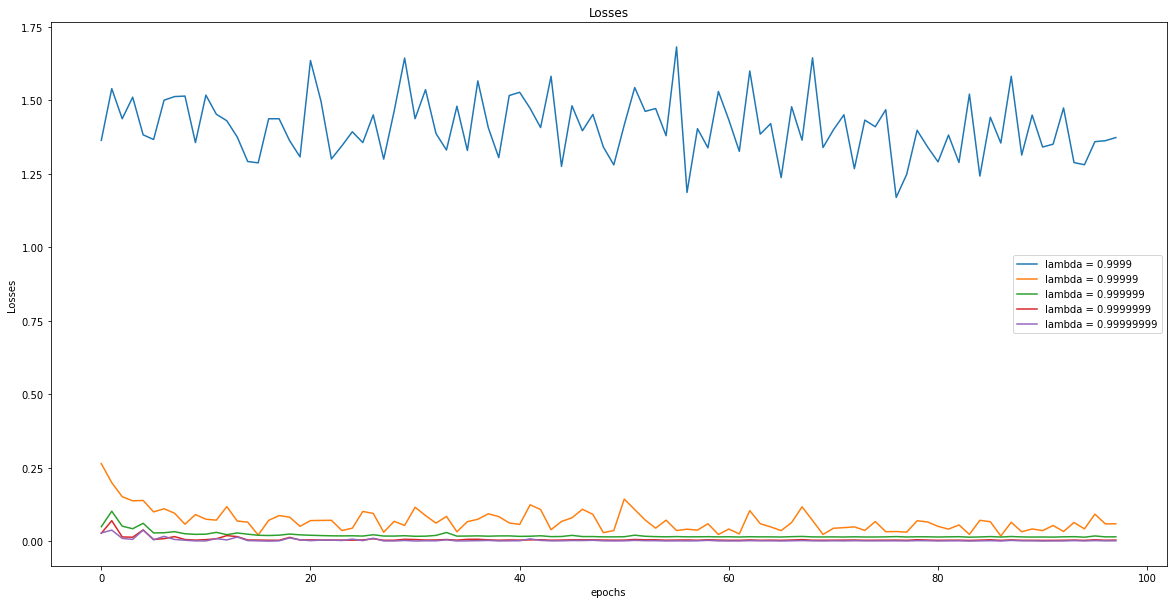

In [60]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.plot(losses_4, label="lambda = 0.9999")
plt.plot(losses_5, label="lambda = 0.99999")
plt.plot(losses_6, label="lambda = 0.999999")
plt.plot(losses_7, label="lambda = 0.9999999")
plt.plot(losses_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Armijo Losses'), dpi=300, facecolor='w')

#show figure
plt.show()

In [61]:
counters_4 = [epoch_data[-2][0] for epoch_data in epochs_data_4]
counters_5 = [epoch_data[-2][0] for epoch_data in epochs_data_5]
counters_6 = [epoch_data[-2][0] for epoch_data in epochs_data_6]
counters_7 = [epoch_data[-2][0] for epoch_data in epochs_data_7]
counters_8 = [epoch_data[-2][0] for epoch_data in epochs_data_8]

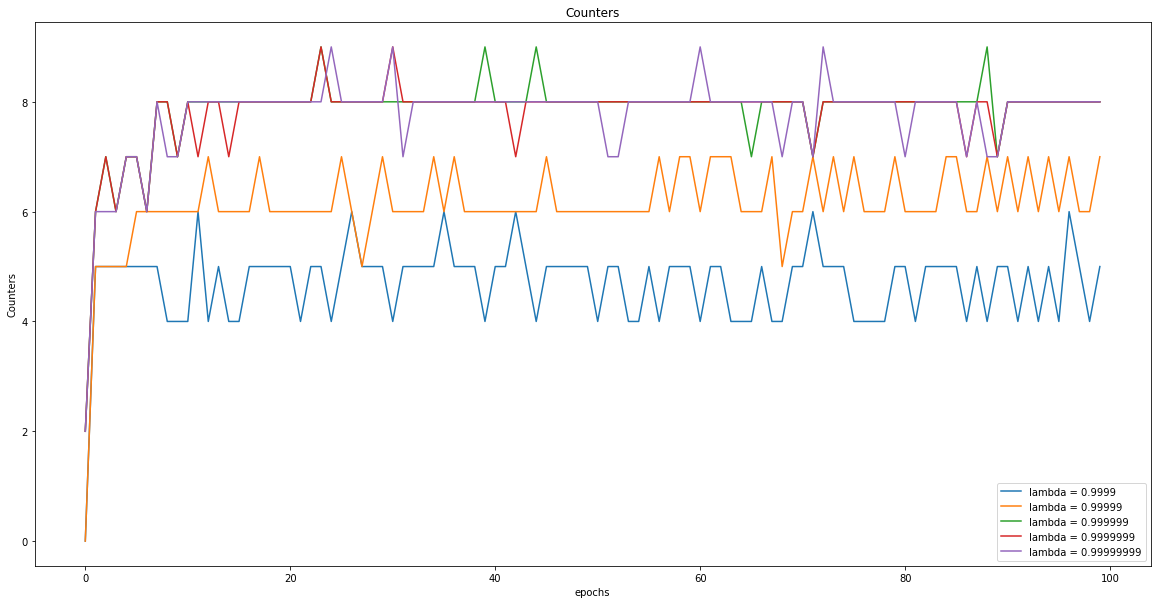

In [62]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("Counters")
plt.xlabel("epochs")
plt.ylabel("Counters")
plt.plot(counters_4, label="lambda = 0.9999")
plt.plot(counters_5, label="lambda = 0.99999")
plt.plot(counters_6, label="lambda = 0.999999")
plt.plot(counters_7, label="lambda = 0.9999999")
plt.plot(counters_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Armijo Counters'), dpi=300, facecolor='w')

#show figure
plt.show()

In [67]:
#sparsities of the armijo
sp_4 = [epoch_data[0] / n_mnist for epoch_data in epochs_data_4]
sp_5 = [epoch_data[0] / n_mnist for epoch_data in epochs_data_5]
sp_6 = [epoch_data[0] / n_mnist for epoch_data in epochs_data_6]
sp_7 = [epoch_data[0] / n_mnist for epoch_data in epochs_data_7]
sp_8 = [epoch_data[0] / n_mnist for epoch_data in epochs_data_8]

print(sp_6)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


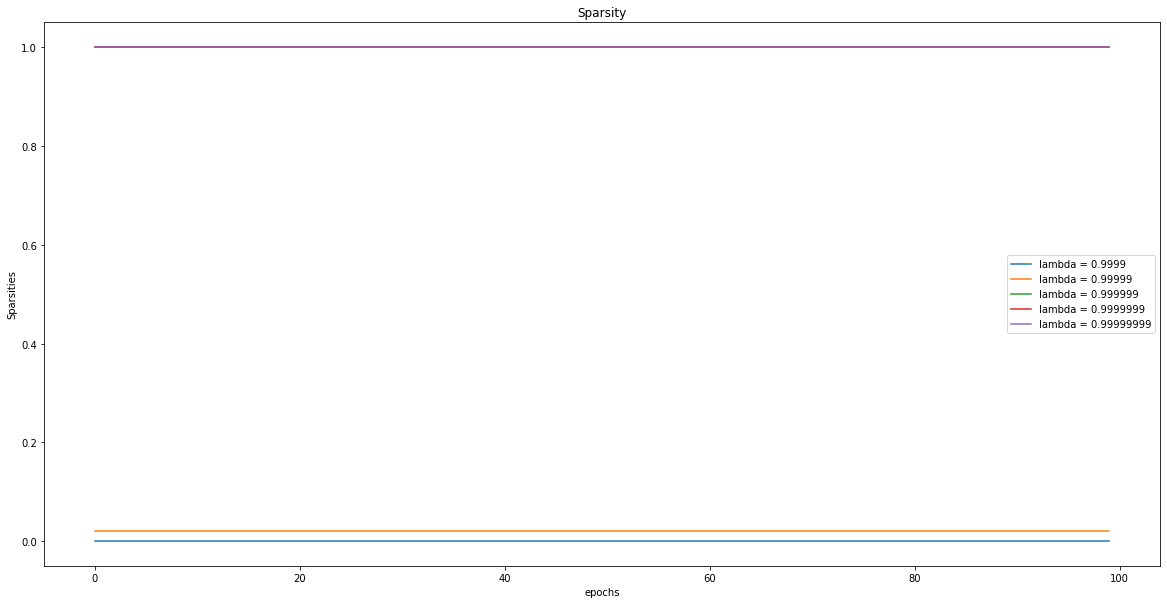

In [65]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("Sparsity")
plt.xlabel("epochs")
plt.ylabel("Sparsities")
plt.plot(sp_4, label="lambda = 0.9999")
plt.plot(sp_5, label="lambda = 0.99999")
plt.plot(sp_6, label="lambda = 0.999999")
plt.plot(sp_7, label="lambda = 0.9999999")
plt.plot(sp_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Armijo Sparsity ratios'), dpi=300, facecolor='w')

#show figure
plt.show()

In [73]:
max_4 = [epoch_data[3] for epoch_data in epochs_data_4]
max_5 = [epoch_data[3] for epoch_data in epochs_data_5]
max_6 = [epoch_data[3] for epoch_data in epochs_data_6]
max_7 = [epoch_data[3] for epoch_data in epochs_data_7]
max_8 = [epoch_data[3] for epoch_data in epochs_data_8]

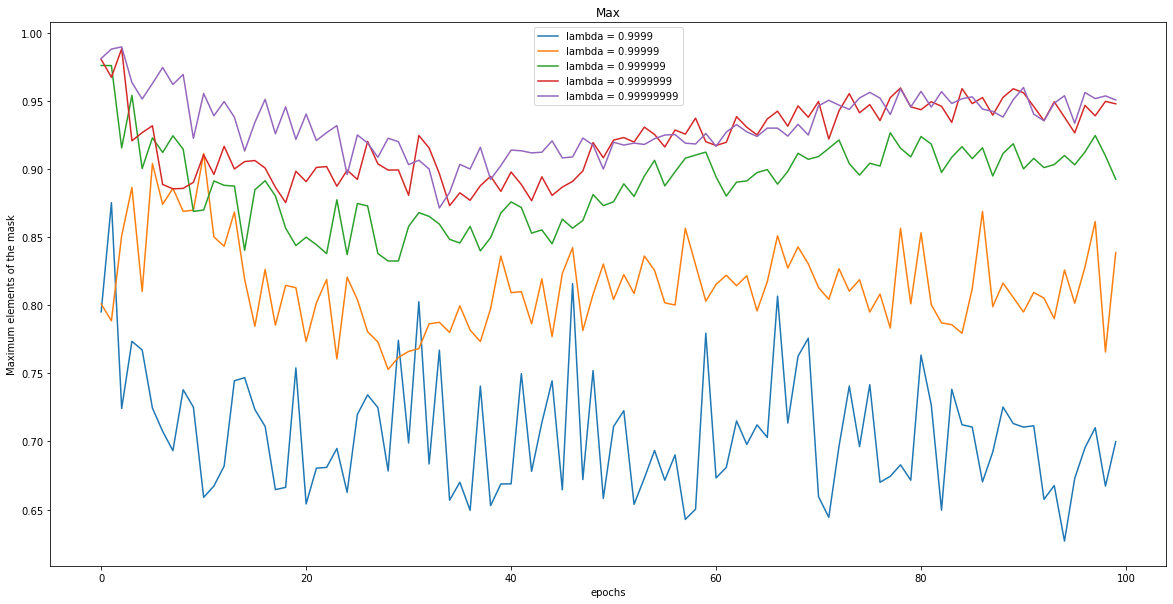

In [74]:
#plot on a same figure all the duality gaps with their labels:

plt.figure(figsize=(20,10))
plt.title("Max")
plt.xlabel("epochs")
plt.ylabel("Maximum elements of the mask")
plt.plot(max_4, label="lambda = 0.9999")
plt.plot(max_5, label="lambda = 0.99999")
plt.plot(max_6, label="lambda = 0.999999")
plt.plot(max_7, label="lambda = 0.9999999")
plt.plot(max_8, label="lambda = 0.99999999")

plt.legend()

#save figure in the saving dir
plt.savefig(os.path.join(saving_dir, 'PenBiP1 Armijo Maximum elements'), dpi=300, facecolor='w')

#show figure
plt.show()

# After all corrections

In [5]:
epochs_data = np.load('n/epochs_data.npy', allow_pickle=True)
supports = [epochs_data[i][-1][0] for i in range(len(epochs_data))]
losses_list = [epochs_data[i][-2][0] for i in range(len(epochs_data))]
duality_gaps = [epochs_data[i][-3][0] for i in range(len(epochs_data))]
l0s = [epochs_data[i][0] for i in range(len(epochs_data))]
l1s = [epochs_data[i][1] for i in range(len(epochs_data))]

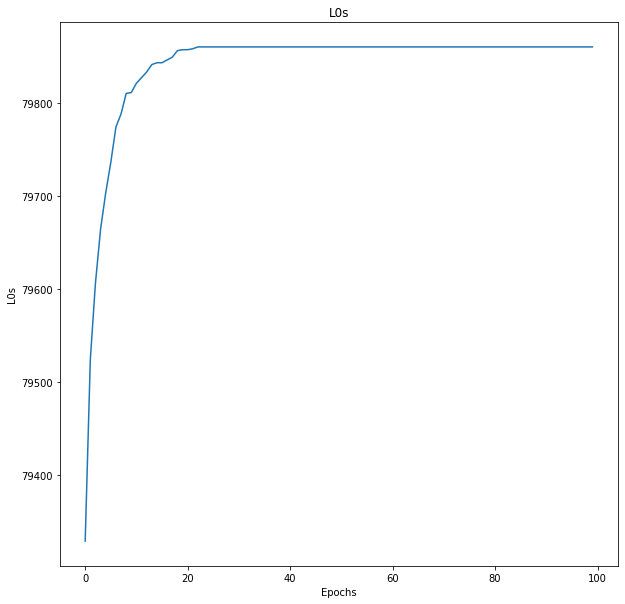

In [6]:
#plot the l0s:
plt.figure(figsize=(10,10))
plt.plot(l0s)
plt.xlabel('Epochs')
plt.ylabel('L0s')
plt.title('L0s')
plt.show()


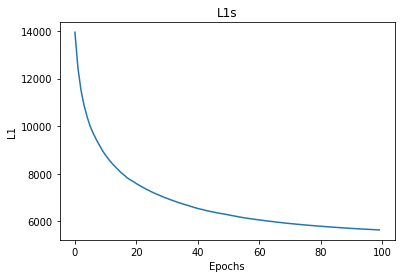

In [7]:
#plot the l1s:
plt.plot(l1s)
plt.xlabel('Epochs')
plt.ylabel('L1')
plt.title('L1s')
plt.show()


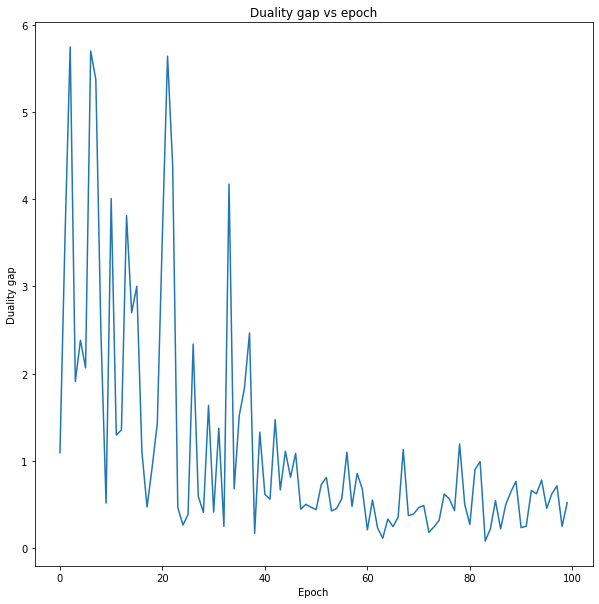

In [8]:
#plot the duality gaps:
plt.figure(figsize=(10, 10))
plt.plot(duality_gaps)
plt.xlabel('Epoch')
plt.ylabel('Duality gap')
plt.title('Duality gap vs epoch')
plt.show()

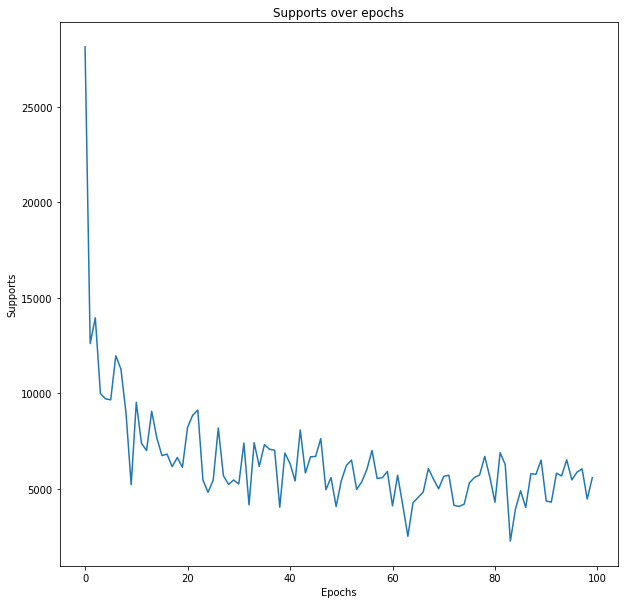

In [10]:
#plot the supports:
plt.figure(figsize=(10,10))
plt.plot(supports)
plt.xlabel('Epochs')
plt.ylabel('Supports')
plt.title('Supports over epochs')
plt.show()

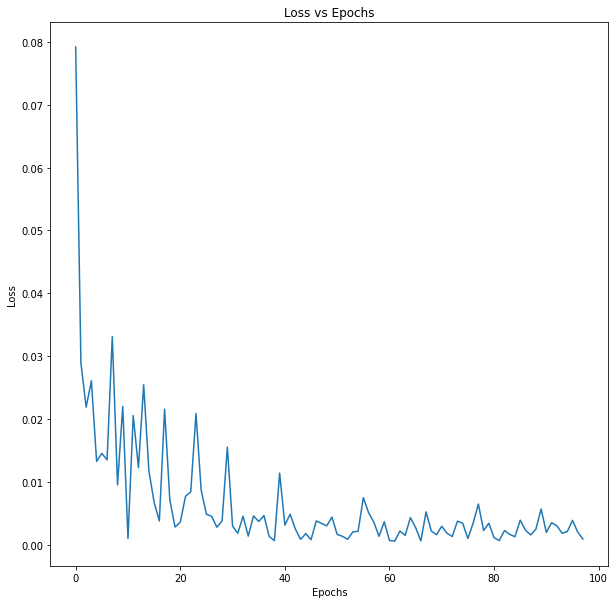

In [13]:
#plot the losses_list
plt.figure(figsize=(10, 10))
plt.plot(losses_list[2:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [14]:
l = epochs_data[0][-3]
print(l[:10])

[1.0912854671478271, 1.5023770332336426, 0.1307082176208496, 0.10545080900192261, 0.1687118262052536, 0.2697504758834839, 0.3881954252719879, 0.44170358777046204, 0.6064130067825317, 0.6958855390548706]


# RC PB1 Corrected (First version)

In [6]:
epochs_data_0 = np.load("pb1_c/0/epochs_data.npy", allow_pickle=True)
epochs_data_1 = np.load("pb1_c/1/epochs_data.npy", allow_pickle=True)
epochs_data_2 = np.load("pb1_c/2/epochs_data.npy", allow_pickle=True)
epochs_data_3 = np.load("pb1_c/3/epochs_data.npy", allow_pickle=True)
epochs_data_4 = np.load("pb1_c/4/epochs_data.npy", allow_pickle=True)
epochs_data_5 = np.load("pb1_c/5/epochs_data.npy", allow_pickle=True)
epochs_data_6 = np.load("pb1_c/6/epochs_data.npy", allow_pickle=True)
epochs_data_7 = np.load("pb1_c/7/epochs_data.npy", allow_pickle=True)
epochs_data_8 = np.load("pb1_c/8/epochs_data.npy", allow_pickle=True)
epochs_data_9 = np.load("pb1_c/9/epochs_data.npy", allow_pickle=True)

In [13]:
#get the final l0 norms. It is the first element of the last list of each epoch_data_number list
l0s = []
for i in range(10):
    var_name = "epochs_data_" + str(i)
    var = globals()[var_name]
    l0s.append(var[-1][0]/n_rc)

print(l0s)

[0.004182240044025842, 0.004734891913117752, 0.007362899342478632, 0.00876118918500599, 0.01224683707572101, 0.023254999484072163, 0.05199352367248901, 0.11190949550856154, 0.22650889187299003, 0.35933084159295586]


# RC BIP comparison

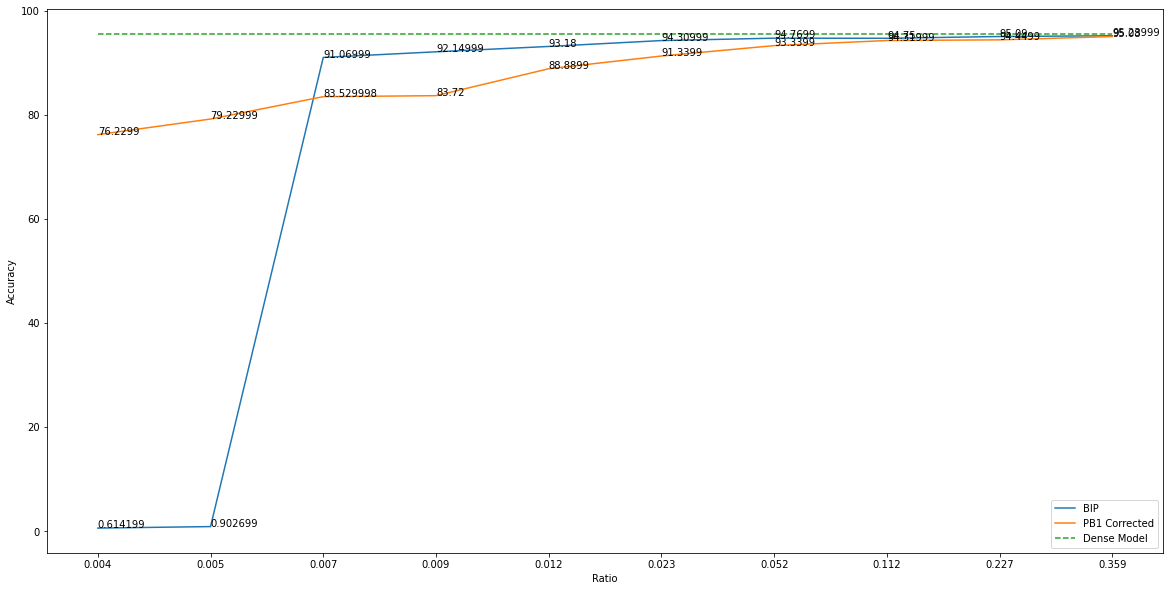

In [18]:
bip_accuracies = [0.614199, 0.902699, 91.06999, 92.14999, 93.18, 94.30999, 94.7699, 94.75, 95.09, 95.23999]
pb1_c_accuracies = [76.2299, 79.22999, 83.529998, 83.72, 88.8899, 91.3399, 93.3399, 94.31999, 94.4499, 95.08]
dense_model = 95.59

#format the ratios as at most 3 digits after the decimal point
ratios = [str(round(ratio, 3)) for ratio in l0s]
#big figure
plt.figure(figsize=(20, 10))
#plot the (ratio, accuracies) for the different methods.
plt.plot(ratios, bip_accuracies, label='BIP')
plt.plot(ratios, pb1_c_accuracies, label='PB1 Corrected')
#plot a horizontal dashed line for the dense model\
plt.plot(ratios, [dense_model for _ in ratios], '--', label='Dense Model')
plt.xlabel('Ratio')
plt.ylabel('Accuracy')
plt.legend()

#annotate the plot with the values
for i, txt in enumerate(bip_accuracies):
    plt.annotate(txt, (ratios[i], bip_accuracies[i]))
for i, txt in enumerate(pb1_c_accuracies):
    plt.annotate(txt, (ratios[i], pb1_c_accuracies[i]))
plt.show()

# Convergence of PB1 Corrected (First version)

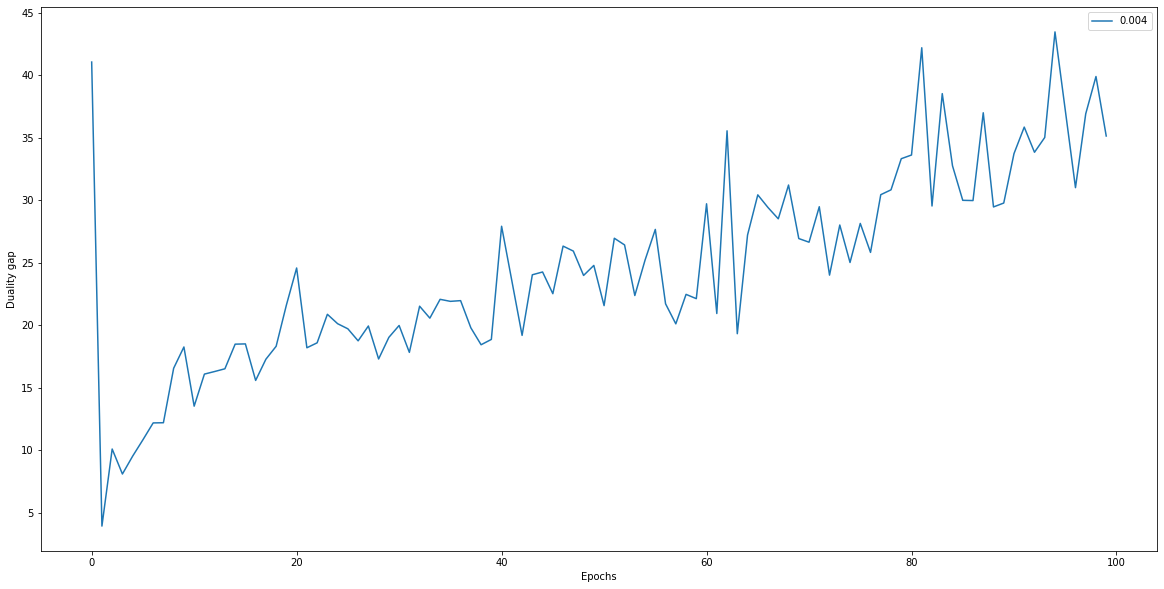

In [20]:
#big figure
plt.figure(figsize=(20,10))
#plot all the duality gaps from 0 to 9. 
for i in range(1):
    var_name = "epochs_data_" + str(i)
    ed = globals()[var_name]
    duality_gaps = [ed[i][-3][0] for i in range(len(ed))]
    plt.plot(duality_gaps, label = ratios[i])
plt.xlabel("Epochs")
plt.ylabel("Duality gap")
plt.legend()
plt.show()



In [ ]:
#Plot only the first 